<a href="https://colab.research.google.com/github/kalavagunta-vamshi/Movie-recomendation-system/blob/main/NetflixMoviesRecommendation_vamshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1>1. Business Problem </h1>

Netflix aims to connect people with movies they love through their recommendation system, CinematchSM. The system predicts whether a user will enjoy a movie based on their past ratings. The goal is to improve these predictions to provide better movie recommendations, thereby enhancing customer satisfaction and business performance.

### Problem Description
Netflix seeks to explore alternative approaches to their existing recommendation system, Cinematch, to see if any can outperform it. This involves making predictions about user ratings for movies they haven't seen yet.

### Project Goal
The primary objective of this project is to develop a recommendation system for Netflix that can predict user ratings for movies, minimizing the error between predicted and actual ratings.

The goal of this project is to develop a recommendation system for Netflix. This system should predict the rating that a user would give to a movie they have not yet rated. The ultimate aim is to improve the movie-watching experience for users by providing personalized movie recommendations based on their unique tastes and preferences.

### Key Elements of the Project

1. **Data Source**: The dataset includes ratings from Netflix users collected between October 1998 and December 2005.
(https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data/data)
2. **Data Characteristics**:
   - 17,770 unique movie IDs.
   - 480,189 unique user IDs.
   - Ratings on a five-star scale (1 to 5).
   - Rating date in the format YYYY-MM-DD.

3. **Tools and Technologies**:
   - **Python 3**
   - **Anaconda**: For installing necessary libraries like sklearn, pandas, seaborn, matplotlib, numpy, scipy.
   - **XGBoost**: For regression models.
   - **Surprise**: For building and analyzing recommendation systems.

4. **Instructions**:
   - Start by downloading the project.
   - Run the "NetflixMoviesRecommendation.ipynb" file in Jupyter Notebook.
   - Ensure that Python 3 and Anaconda are installed.
   - Install XGBoost (`conda install -c conda-forge xgboost`).
   - Install Surprise (`pip install surprise`).

### Additional Details

- **Visualization and Data Handling**: Use libraries like matplotlib, seaborn, pandas, numpy, and scipy for data visualization and handling.
- **Machine Learning**: Utilize sklearn for machine learning tasks.
- **Acknowledgments**: Credits to the Machine learning course CMSC422 UMD.
- **Research paper**: http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf (most of my work was inspired by this paper)

### Steps to Proceed

1. **Environment Setup**:
   - Install Python 3, Anaconda, XGBoost, and Surprise.

2. **Data Preprocessing**:
   - Load and clean the dataset.
   - Perform exploratory data analysis (EDA).

3. **Model Development**:
   - Implement collaborative filtering, content-based filtering, or hybrid methods using Surprise and XGBoost.
   - Train and evaluate the models.

4. **Evaluation and Optimization**:
   - Use RMSE and MAPE metrics for evaluation.
   - Optimize hyperparameters for better performance.

5. **Deployment**:
   - Deploy the model as an API or integrate it into a web application.


In [1]:
#installing the Kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d netflix-inc/netflix-prize-data

Dataset URL: https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data
License(s): other
 98% 669M/683M [00:04<00:00, 195MB/s]
100% 683M/683M [00:04<00:00, 148MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/netflix-prize-data.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import pandas as pd

# Define the path to the CSV file
csv_file_path = 'movie_titles.csv'

# Read the CSV file into a DataFrame with a specified encoding
try:
    df = pd.read_csv(csv_file_path, encoding='latin1', on_bad_lines='skip')  # or 'ISO-8859-1'
    # Print the first few rows of the DataFrame to verify the content
    print(df.head())
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")


   1    2003               Dinosaur Planet
0  2  2004.0    Isle of Man TT 2004 Review
1  3  1997.0                     Character
2  4  1994.0  Paula Abdul's Get Up & Dance
3  5  2004.0      The Rise and Fall of ECW
4  6  1997.0                          Sick


In [6]:
# Define the path to the text file
file_path = 'combined_data_3.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        if i < 10:
            print(line.strip())
        else:
            break



9211:
1277134,1,2003-12-02
2435457,2,2005-06-01
2338545,3,2001-02-17
2218269,1,2002-12-27
441153,4,2002-10-11
1921624,2,2005-08-31
2096652,3,2004-05-31
818736,2,2004-02-17
284560,3,2003-07-27


In [7]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357222 sha256=bab7af044033797e654f919731ac52d614ca828e78a8156322e9b8e78dbcd76f
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [8]:
!pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.9 MB/s eta 0:00:00


### Detailed Explanation of the Research paper: "Factor in the Neighbors: Scalable and Accurate Collaborative Filtering"

**Authors**: Yehuda Koren, Yahoo! Research

**Summary**:
The paper presents a new neighborhood model for collaborative filtering (CF) that enhances prediction accuracy while addressing scalability issues. It focuses on making the model more accurate and scalable by minimizing a global cost function and incorporating both explicit and implicit user feedback. The methods were tested on the Netflix dataset, showing promising results.

### Key Concepts and Sections

1. **Introduction**:
   - **Recommender Systems**: Systems that provide personalized suggestions for products or services based on past user behavior.
   - **Collaborative Filtering (CF)**: A method that relies on past transactions to establish connections between users and products.
   - **Neighborhood Models**: Traditional CF models that compute similarities between users or items to make recommendations.
   - **Latent Factor Models**: Alternative CF models that transform both items and users into a common latent factor space for comparison.

2. **Challenges in Traditional Neighborhood Models**:
   - **Scalability**: Traditional models require computing all pairwise similarities, which becomes impractical with large datasets.
   - **Accuracy**: Traditional models rely on heuristic similarities, which may not be optimal.

3. **New Neighborhood Model**:
   - **Global Optimization**: The new model improves prediction accuracy by modeling neighborhood relations through a global cost function.
   - **Incorporating Feedback**: It integrates both explicit (e.g., ratings) and implicit (e.g., purchase history) feedback to enhance predictions.
   - **Scalability**: The model scales linearly with the size of the data, making it practical for large datasets like Netflix.

4. **Methodology**:
   - **Baseline Estimates**: Adjusts for user and item effects to create baseline estimates for unknown ratings.
   - **Similarity Measures**: Uses a shrunk Pearson correlation coefficient to measure item-item similarity.
   - **Prediction Rule**: Combines baseline estimates with weighted averages of neighboring items' ratings to predict unknown ratings.

5. **Factorized Neighborhood Model**:
   - **Factorization**: Factors item-item relationships into latent factors, reducing computational complexity.
   - **Efficiency**: Achieves linear time and space complexity, making it scalable to large datasets.
   - **Accuracy**: Maintains or improves accuracy compared to traditional models.

6. **Experimental Results**:
   - **Netflix Dataset**: The new model was tested on the Netflix dataset, achieving lower RMSE compared to traditional models.
   - **Top-K Recommendations**: The model was evaluated for its ability to make top-K recommendations, showing significant improvements.

7. **User-User Model**:
   - **Adaptation**: Adapts the item-item model to a user-user model by switching roles of users and items.
   - **Efficiency**: Factorization makes the user-user model as efficient as the item-item model.
   - **Combination**: Combining item-item and user-user models can further improve accuracy.

8. **Conclusion**:
   - **Improvements**: The new neighborhood model provides improved accuracy and scalability.
   - **Integration**: The model can integrate with other models and handle large datasets effectively.

### Application to Your Project

In your Netflix movie recommendation system project, you can apply the insights from this paper as follows:

1. **Model Selection**:
   - **Neighborhood Models**: Implement item-item and user-user neighborhood models using the principles outlined in the paper.
   - **Factorization**: Use factorization to reduce computational complexity and improve scalability.

2. **Global Optimization**:
   - Minimize a global cost function to model neighborhood relations, enhancing prediction accuracy.

3. **Feedback Integration**:
   - Incorporate both explicit (user ratings) and implicit feedback (e.g., watch history) to improve recommendations.

4. **Scalability**:
   - Ensure your model scales linearly with the data size, making it practical for large datasets like Netflix's.

5. **Evaluation**:
   - Use RMSE and top-K recommendation performance to evaluate and compare your model's accuracy.



**Type of Machine Learning Problem:**

The task is to predict the rating a user would give to a movie. This is a Recommendation problem and can also be seen as a Regression problem because it involves predicting a continuous value (the rating).

**Performance Metric:**

**Mean Absolute Percentage Error (MAPE):** Measures the accuracy of predictions as a percentage of error.

**Root Mean Square Error (RMSE):** Measures the square root of the average squared differences between predicted and actual ratings.
Machine Learning Objective and Constraints:

**Objective:** Minimize RMSE.

**Constraint:** Provide some form of interpretability.

<h1> 2. Machine Learning Problem </h1>

<h2>2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> Data files :
<ul>
<li> combined_data_1.txt </li>
<li> combined_data_2.txt </li>
<li> combined_data_3.txt </li>
<li> combined_data_4.txt </li>
<li> movie_titles.csv </li>
</ul>
  


The first line of each file [combined_data_1.txt, combined_data_2.txt, combined_data_3.txt, combined_data_4.txt] contains the movie id followed by a colon. Each subsequent line in the file corresponds to a rating from a customer and its date in the following format:


**CustomerID,Rating,Date**

MovieIDs range from 1 to 17770 sequentially.

CustomerIDs range from 1 to 2649429, with gaps. There are 480189 users.

Ratings are on a five star (integral) scale from 1 to 5.

Dates have the format YYYY-MM-DD.


In [9]:
# Importing necessary libraries
from datetime import datetime  # For handling date and time operations
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import seaborn as sns  # For data visualization
sns.set_style("whitegrid")  # Setting the style for seaborn plots

import os  # For interacting with the operating system
import random  # For generating random numbers

import matplotlib  # For creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt  # For plotting data

from scipy import sparse  # For working with sparse matrices
from sklearn.metrics.pairwise import cosine_similarity  # For computing cosine similarity between vectors
from sklearn.metrics import mean_squared_error  # For computing mean squared error

import xgboost as xgb  # For gradient boosting algorithms
from surprise import Reader, Dataset  # For working with datasets in Surprise
from surprise import BaselineOnly, KNNBaseline, SVD, SVDpp  # Various algorithms from the Surprise library
from surprise.model_selection import GridSearchCV  # For hyperparameter tuning


<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Preprocessing</h2>

<h3>3.1.1 Converting / Merging whole data to required format: u_i, m_j, r_ij</h3>

In [10]:
# Step 1: Track the time it takes to run this block of code
start = datetime.now()

# Step 2: Check if 'data.csv' file already exists
if not os.path.isfile('data.csv'):
    # Step 3: Create 'data.csv' file to store all the data
    with open('data.csv', mode='w') as data:
        # Step 4: List of all the files containing ratings data
        files=['combined_data_1.txt','combined_data_2.txt','combined_data_3.txt', 'combined_data_4.txt']

        # Step 5: Initialize an empty list to hold data rows temporarily
        row = list()

        # Step 6: Loop through each file
        for file in files:
            print("Reading ratings from {}...".format(file))

            # Step 7: Open each file
            with open(file) as f:
                # Step 8: Read each line in the file
                for line in f:
                    del row[:]  # Clear the list for new data
                    line = line.strip()  # Remove leading/trailing whitespaces

                    # Step 9: Check if the line ends with ':', indicating a movie ID
                    if line.endswith(':'):
                        movie_id = line.replace(':', '')  # Extract the movie ID
                    else:
                        # Step 10: Split the line into user_id, rating, and date
                        row = [x for x in line.split(',')]
                        row.insert(0, movie_id)  # Insert the movie ID at the beginning

                        # Step 11: Write the row to 'data.csv' file
                        data.write(','.join(row))
                        data.write('\n')

            print("Done.\n")

    # Step 12: Close the 'data.csv' file after writing all data
    data.close()

# Step 13: Print the time taken to run the above code block
print('Time taken :', datetime.now() - start)


Reading ratings from combined_data_1.txt...
Done.

Reading ratings from combined_data_2.txt...
Done.

Reading ratings from combined_data_3.txt...
Done.

Reading ratings from combined_data_4.txt...
Done.

Time taken : 0:01:49.088926


In [11]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'data.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first 5 lines
print(df.head(10))


   1  1488844  3  2005-09-06
0  1   822109  5  2005-05-13
1  1   885013  4  2005-10-19
2  1    30878  4  2005-12-26
3  1   823519  3  2004-05-03
4  1   893988  3  2005-11-17
5  1   124105  4  2004-08-05
6  1  1248029  3  2004-04-22
7  1  1842128  4  2004-05-09
8  1  2238063  3  2005-05-11
9  1  1503895  4  2005-05-19


In [12]:
# Step 1: Track the time it takes to run this block of code
#start = datetime.now()

# Step 2: Printing a message to indicate the start of DataFrame creation
print("Creating the DataFrame from data.csv file..")

# Step 3: Reading the CSV file into a DataFrame
# Use 'on_bad_lines' to skip lines with errors
df = pd.read_csv('data.csv', sep=',', names=['movie', 'user', 'rating', 'date'], parse_dates=['date'], on_bad_lines='skip')

# Step 4: Converting the 'date' column to datetime format
# Remove any rows where the 'date' column could not be parsed
df = df.dropna(subset=['date'])

# Printing a message to indicate the completion of DataFrame creation
print('Done.\n')

# Step 5: Arranging the ratings according to time
# Printing a message to indicate the start of sorting
print('Sorting the DataFrame by date..')

# Sorting the DataFrame by the 'date' column
df.sort_values(by='date', inplace=True)

# Printing a message to indicate the completion of sorting
print('Done..')

# Step 6: Print the time taken to run the above code block
#print('Time taken :', datetime.now() - start)


Creating the DataFrame from data.csv file..
Done.

Sorting the DataFrame by date..
Done..


In [13]:
df.head()

,movie,user,rating,date
56431994,10341,510180,4,1999-11-11
9056171,1798,510180,5,1999-11-11
58698779,10774,510180,3,1999-11-11
48101611,8651,510180,2,1999-11-11
81893208,14660,510180,2,1999-11-11


In [14]:
df.describe()['rating']





count    1.004805e+08
mean     3.604290e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
std      1.085219e+00
Name: rating, dtype: float64

<h3>3.1.2 Checking for NaN values </h3>

In [15]:
# Printing the message to indicate the start of NaN check
print("Checking for NaN values...")

# Checking for NaN values
# df.isnull() returns a DataFrame of the same shape as df, with boolean values indicating if the values are NaN (True) or not (False).
# df.isnull().any() returns a Series indicating if there are any NaN values in each column.
# sum(df.isnull().any()) sums up the True values in the Series to get the count of columns containing NaN values.
num_nan_values = sum(df.isnull().any())

# Printing the number of columns containing NaN values
print("Number of columns with NaN values in our DataFrame: ", num_nan_values)

Checking for NaN values...
Number of columns with NaN values in our DataFrame:  0


<h3>3.1.3 Removing Duplicates </h3>

In [16]:
# Check for duplicate rating entries in the DataFrame
# Identify duplicates based on 'movie', 'user', and 'rating' columns

# Step 1: Identify duplicate entries
dup_bool = df.duplicated(['movie', 'user', 'rating'])

# Step 2: Count the number of duplicate entries
dups = sum(dup_bool)  # Summing the boolean values gives the count of duplicates

# Step 3: Print the number of duplicate rating entries
print("There are {} duplicate rating entries in the data..".format(dups))


There are 0 duplicate rating entries in the data..


 <h3>3.1.4 Basic Statistics (#Ratings, #Users, and #Movies)</h3>

In [17]:
import numpy as np

# Print summary of the total data
print("Total data ")
print("-" * 50)

# Step 1: Print the total number of ratings
# df.shape[0] returns the number of rows in the DataFrame, which represents the total number of ratings.
print("\nTotal no of ratings :", df.shape[0])

# Step 2: Print the total number of unique users
# np.unique(df.user) returns an array of unique user IDs, and len() gives the count of unique users.
print("Total No of Users   :", len(np.unique(df.user)))

# Step 3: Print the total number of unique movies
# np.unique(df.movie) returns an array of unique movie IDs, and len() gives the count of unique movies.
print("Total No of movies  :", len(np.unique(df.movie)))


Total data 
--------------------------------------------------

Total no of ratings : 100480507
Total No of Users   : 480189
Total No of movies  : 17770


<h2>3.2 Spliting data into Train and Test(80:20) </h2>

df.iloc[:int(df.shape[0]*0.80)] = first 80 percent rows [:80]

df.iloc[int(df.shape[0]*0.80):] = next 20 percent rows  [80:] = remaining 20


In [18]:
# Check if 'train.csv' exists
if not os.path.isfile('train.csv'):
    # Step 1: Create training DataFrame and store it on disk
    # df.iloc[:int(df.shape[0]*0.80)] selects the first 80% of the DataFrame rows for training data
    # .to_csv("train.csv", index=False) saves the selected rows to 'train.csv' without including the row indices
    df.iloc[:int(df.shape[0]*0.80)].to_csv("train.csv", index=False)

# Check if 'test.csv' exists
if not os.path.isfile('test.csv'):
    # Step 2: Create testing DataFrame and store it on disk
    # df.iloc[int(df.shape[0]*0.80):] selects the remaining 20% of the DataFrame rows for testing data
    # .to_csv("test.csv", index=False) saves the selected rows to 'test.csv' without including the row indices
    df.iloc[int(df.shape[0]*0.80):].to_csv("test.csv", index=False)

# Step 3: Load training DataFrame from 'train.csv'
# pd.read_csv("train.csv", parse_dates=['date']) reads 'train.csv' into a DataFrame, parsing the 'date' column as datetime
train_df = pd.read_csv("train.csv", parse_dates=['date'])

# Step 4: Load testing DataFrame from 'test.csv'
# pd.read_csv("test.csv") reads 'test.csv' into a DataFrame
test_df = pd.read_csv("test.csv")


<h3>3.2.1 Basic Statistics in Train and Test data (#Ratings, #Users, and #Movies)</h3>

In [19]:
# Basic Statistics in Train and Test data (#Ratings, #Users, and #Movies)

# Print statistics for the training data
print("Training data ")
print("-" * 50)

# Step 1: Print the total number of ratings in the training data
# train_df.shape[0] returns the number of rows in the training DataFrame, which represents the total number of ratings.
print("\nTotal no of ratings :", train_df.shape[0])

# Step 2: Print the total number of unique users in the training data
# np.unique(train_df.user) returns an array of unique user IDs in the training DataFrame.
# len(np.unique(train_df.user)) returns the count of unique user IDs.
print("Total No of Users   :", len(np.unique(train_df.user)))

# Step 3: Print the total number of unique movies in the training data
# np.unique(train_df.movie) returns an array of unique movie IDs in the training DataFrame.
# len(np.unique(train_df.movie)) returns the count of unique movie IDs.
print("Total No of movies  :", len(np.unique(train_df.movie)))

# Print statistics for the test data
print("Test data ")
print("-" * 50)

# Step 4: Print the total number of ratings in the test data
# test_df.shape[0] returns the number of rows in the testing DataFrame, which represents the total number of ratings.
print("\nTotal no of ratings :", test_df.shape[0])

# Step 5: Print the total number of unique users in the test data
# np.unique(test_df.user) returns an array of unique user IDs in the testing DataFrame.
# len(np.unique(test_df.user)) returns the count of unique user IDs.
print("Total No of Users   :", len(np.unique(test_df.user)))

# Step 6: Print the total number of unique movies in the test data
# np.unique(test_df.movie) returns an array of unique movie IDs in the testing DataFrame.
# len(np.unique(test_df.movie)) returns the count of unique movie IDs.
print("Total No of movies  :", len(np.unique(test_df.movie)))


Training data 
--------------------------------------------------

Total no of ratings : 80384405
Total No of Users   : 405041
Total No of movies  : 17424
Test data 
--------------------------------------------------

Total no of ratings : 20096102
Total No of Users   : 349312
Total No of movies  : 17757


 <h2> 3.3 Exploratory Data Analysis on Train data </h2>


 ## What is Dask?
Dask is a parallel computing library that scales the existing Python ecosystem. It allows you to work with large datasets and perform complex computations by parallelizing operations and distributing them across multiple cores or even multiple machines.

##Key Features of Dask:
**Parallel Computing:**
Dask can parallelize operations on large datasets, allowing computations to be distributed across multiple CPU cores or machines.

**Scalable:**
Dask scales from single machines to large clusters, making it suitable for both small and large-scale data processing tasks.

**Familiar Interface:**
Dask DataFrames and Dask Arrays provide familiar interfaces similar to pandas and NumPy, making it easy to switch from using these libraries to using Dask.

**Out-of-Core Computation:**
Dask can handle datasets that don't fit into memory by processing them in chunks and using disk storage as needed.

In [20]:
# Install Dask if not already installed
!pip install dask[complete]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.7/205.7 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.6.4
    Uninstalling importlib-metadata-4.6.4:
      Successfully uninstalled importlib-metadata-4.6.4


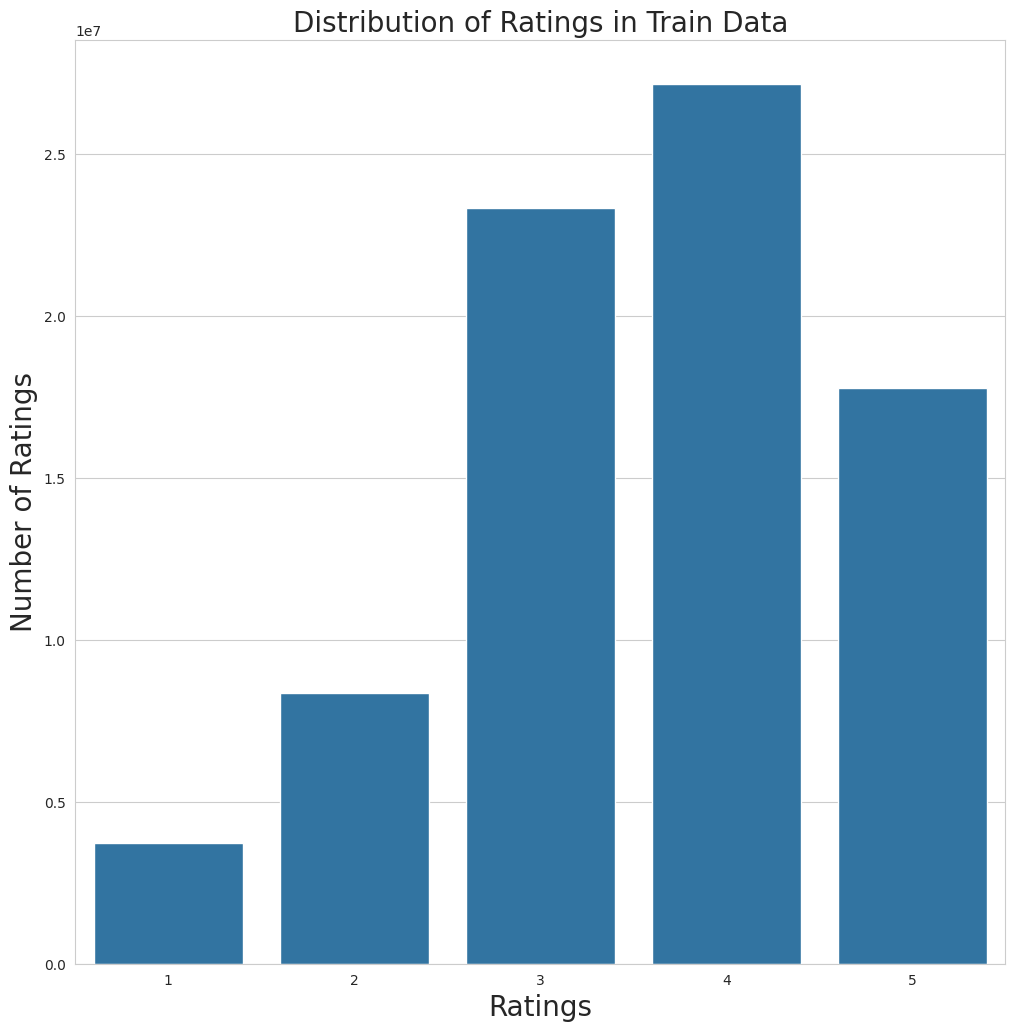

In [21]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file using Dask, removing the parse_dates argument
df = dd.read_csv("train.csv")

# Compute the count of each rating
rating_counts = df['rating'].value_counts().compute()

# Convert to DataFrame for plotting
rating_counts = rating_counts.reset_index()
rating_counts.columns = ['rating', 'count']

# Set the size of the figure
plt.figure(figsize=(12, 12))

# Create a bar plot of the aggregated ratings
sns.barplot(x="rating", y="count", data=rating_counts)

# Set title and axis labels
plt.title("Distribution of Ratings in Train Data", fontsize=20)
plt.xlabel("Ratings", fontsize=20)
plt.ylabel("Number of Ratings", fontsize=20)

# Display the plot
plt.show()

In [22]:
train_df = pd.read_csv("train.csv", parse_dates=['date'])
train_df['day_of_week'] = train_df.date.dt.day_name()
train_df.tail()

,movie,user,rating,date,day_of_week
80384400,12074,2033618,4,2005-08-08,Monday
80384401,862,1797061,3,2005-08-08,Monday
80384402,10986,1498715,5,2005-08-08,Monday
80384403,14861,500016,4,2005-08-08,Monday
80384404,5926,1044015,5,2005-08-08,Monday


<h3> 3.3.2 Number of Ratings per a month </h3>

<h3> 3.3.3 Analysis on the Ratings given by user </h3>

In [23]:
# Group the DataFrame by 'user' and count the number of 'rating' entries for each user
no_of_rated_movies_per_user = train_df.groupby(by='user')['rating'].count().sort_values(ascending=False)

# Display the top 5 users with the most ratings
no_of_rated_movies_per_user.head()


user
305344     17112
2439493    15896
387418     15402
1639792     9767
1461435     9447
Name: rating, dtype: int64

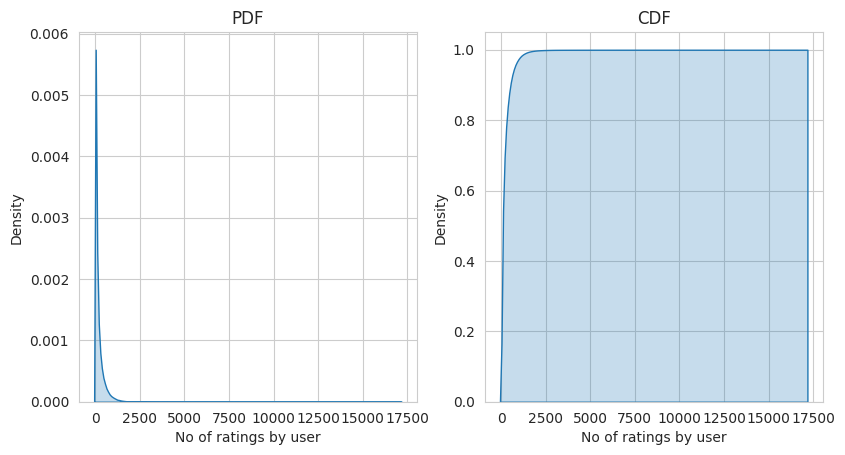

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specific aspect ratio
fig = plt.figure(figsize=plt.figaspect(.5))

# Create the first subplot for the PDF
ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, fill=True, ax=ax1)
ax1.set_xlabel('No of ratings by user')
ax1.set_title("PDF")

# Create the second subplot for the CDF
ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, fill=True, cumulative=True, ax=ax2)
ax2.set_xlabel('No of ratings by user')
ax2.set_title('CDF')

# Display the plot
plt.show()


### What is a PDF?

**Probability Density Function (PDF)**:
- The PDF represents the density of data points at different values.
- For continuous data, the PDF describes the likelihood of a data point falling within a particular range of values.
- The area under the curve of the PDF over a range represents the probability of the data falling within that range.

**In the Plot**:
- The left plot shows the PDF of the number of ratings given by users.
- The x-axis represents the number of ratings by a user.
- The y-axis represents the density of users with a particular number of ratings.
- The peak at the left side of the plot indicates that most users have rated very few movies.

### What is a CDF?

**Cumulative Distribution Function (CDF)**:
- The CDF represents the cumulative probability up to a certain value.
- It shows the probability that a random variable takes a value less than or equal to a specific value.
- The CDF starts at 0 and increases to 1 as you move along the x-axis.

**In the Plot**:
- The right plot shows the CDF of the number of ratings given by users.
- The x-axis represents the number of ratings by a user.
- The y-axis represents the cumulative probability.
- The steep rise at the beginning indicates that a large proportion of users have given relatively few ratings.

### Interpretation of Your Specific Plots

1. **PDF Plot**:
   - The peak at the beginning of the plot indicates that most users have given a small number of ratings.
   - The density quickly drops off, showing that very few users have given a large number of ratings.
   - The long tail indicates that a small number of users have given many ratings.

2. **CDF Plot**:
   - The steep rise at the start of the plot shows that a large proportion of users have given very few ratings.
   - The CDF reaches near 1 quite early, indicating that almost all users have given fewer than 2,500 ratings.
   - This confirms the observation from the PDF that very few users have given a large number of ratings.

### Summary

- **PDF**: Shows that most users have rated very few movies, and a small number of users have rated a lot of movies.
- **CDF**: Confirms that the majority of users have given a small number of ratings, with the CDF reaching near 1 quickly, indicating that most users fall within the lower range of ratings.

These plots provide a clear visual representation of the distribution of the number of ratings per user, helping to understand user behavior in terms of rating activity.

In [25]:
print("Information about movie ratings grouped by users:")
no_of_rated_movies_per_user.describe()

Information about movie ratings grouped by users:


count    405041.000000
mean        198.459921
std         290.793238
min           1.000000
25%          34.000000
50%          89.000000
75%         245.000000
max       17112.000000
Name: rating, dtype: float64

<h3> 3.3.4 Analysis of ratings of a movie given by a user </h3>

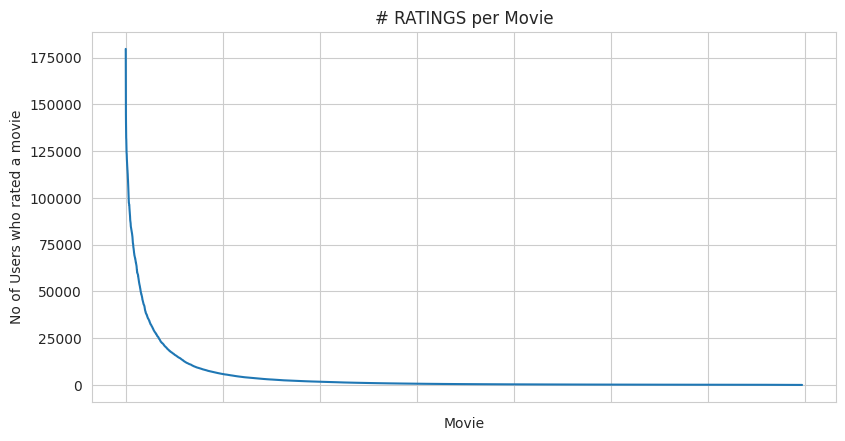

In [26]:
import matplotlib.pyplot as plt

# Calculate the number of ratings per movie
no_of_ratings_per_movie = train_df.groupby(by='movie')['rating'].count().sort_values(ascending=False)

# Create a figure with a specific aspect ratio
fig = plt.figure(figsize=plt.figaspect(.5))

# Get the current axes instance
ax = plt.gca()

# Plot the number of ratings per movie
plt.plot(no_of_ratings_per_movie.values)

# Set the title and axis labels
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')

# Remove x-axis labels
ax.set_xticklabels([])

# Display the plot
plt.show()


##Highly Skewed Distribution:

A small number of movies are extremely popular and receive the majority of the ratings.
The majority of movies receive far fewer ratings, creating a long-tail distribution.

##Implications for Recommendation Systems:

Focus on Popular Movies: Popular movies are crucial for recommendations because they have a lot of user interaction.
Challenge with Less Popular Movies: It can be challenging to recommend less popular movies due to the limited number of ratings.

<h3> 3.3.5 Number of ratings on each day of the week</h3>

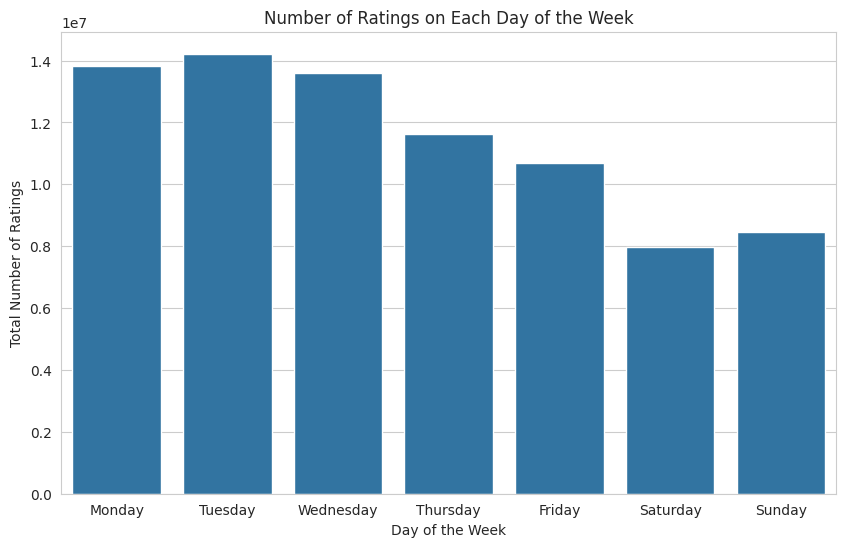

In [27]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file using Dask
df = dd.read_csv("train.csv", parse_dates=['date'])

# Extract the day of the week from the 'date' column
df['day_of_week'] = df['date'].dt.day_name()

# Compute the count of each day of the week
day_of_week_counts = df['day_of_week'].value_counts().compute()

# Plot the number of ratings on each day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Ratings on Each Day of the Week')
plt.ylabel('Total Number of Ratings')
plt.xlabel('Day of the Week')
plt.show()


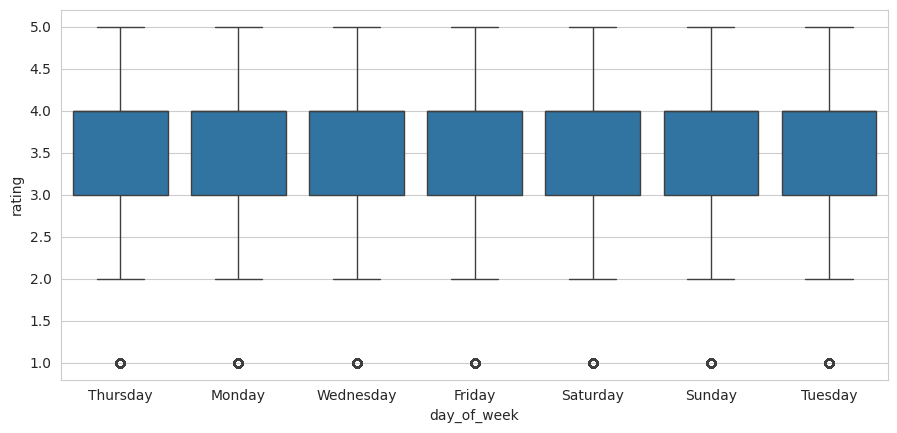

0:02:26.904264


In [28]:
# Read the CSV file into a DataFrame, parsing the 'date' column as dates
train_df = pd.read_csv("train.csv", parse_dates=['date'])

# Add a new column 'day_of_week' to train_df, containing the day name extracted from the 'date' column
train_df['day_of_week'] = train_df['date'].dt.day_name()

# Start the timer to measure execution time
start = datetime.now()

# Create a figure for the plot with a specific aspect ratio
fig = plt.figure(figsize=plt.figaspect(.45))

# Create a box plot showing the distribution of ratings per day of the week
sns.boxplot(y='rating', x='day_of_week', data=train_df)

# Display the plot
plt.show()

# Print the time taken to create and display the plot
print(datetime.now() - start)


In [29]:
# Group the data by 'day_of_week' and calculate the average rating for each day
avg_week_df = train_df.groupby(by=['day_of_week'])['rating'].mean()

# Print the average ratings
print("Average ratings")
print("-" * 30)
print(avg_week_df)
print("\n")


Average ratings
------------------------------
day_of_week
Friday       3.585274
Monday       3.577250
Saturday     3.591791
Sunday       3.594144
Thursday     3.582463
Tuesday      3.574438
Wednesday    3.583751
Name: rating, dtype: float64




<h3> 3.3.6 Creating sparse matrix from data frame </h3>

<h4> 3.3.6.1 Creating sparse matrix from train data frame </h4>

A sparse matrix is a matrix that contains mostly zero values. In contrast, a dense matrix stores all elements, even if they are zero. Sparse matrices are used in many fields, including scientific computing, machine learning, and data analysis, where large datasets with many zero values are common.

Sparse matrices store only the non-zero values along with their row and column indices, which significantly reduces memory usage and speeds up operations involving matrix calculations. There are several popular formats for storing sparse matrices, including Compressed Sparse Row (CSR), Compressed Sparse Column (CSC), and Coordinate List (COO). Each format has its advantages depending on the specific operations you need to perform on the matrix.

For example, in a recommendation system where users rate movies, most users will have rated only a small fraction of all movies. In this case, a sparse matrix is an efficient way to represent the user-item ratings because it avoids storing many zeros.

In the code you provided, the sparse matrix is created from the `train_df` DataFrame, where each row corresponds to a user-movie rating. The matrix is stored in Compressed Sparse Row (CSR) format, which is efficient for row-wise operations. It is then saved to disk for future use.

In [30]:
# Start the timer
start = datetime.now()

# Check if the sparse matrix file exists
if os.path.isfile('train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # Load the sparse matrix from the file
    train_sparse_matrix = sparse.load_npz('train_sparse_matrix.npz')
    print("DONE..")
else:
    print("We are creating sparse_matrix from the dataframe..")
    # Create a sparse matrix from the 'train_df' DataFrame
    train_sparse_matrix = sparse.csr_matrix((train_df.rating.values, (train_df.user.values,
                                               train_df.movie.values)),)

    print('Done. It\'s shape is : (user, movie) : ', train_sparse_matrix.shape)
    print('Saving it into disk for further usage..')
    # Save the sparse matrix to a file
    sparse.save_npz("train_sparse_matrix.npz", train_sparse_matrix)
    print('Done..\n')

# Print the time taken to complete the operation
print(datetime.now() - start)


We are creating sparse_matrix from the dataframe..
Done. It's shape is : (user, movie) :  (2649430, 17771)
Saving it into disk for further usage..
Done..

0:00:48.953361


In [31]:
# Get the shape of the sparse matrix (number of users and movies)
us, mv = train_sparse_matrix.shape

# Count the number of non-zero elements in the sparse matrix
elem = train_sparse_matrix.count_nonzero()

# Calculate the sparsity of the matrix as a percentage
sparsity = (1 - (elem / (us * mv))) * 100

# Print the sparsity of the matrix
print("Sparsity Of Train matrix: {} %".format(sparsity))


Sparsity Of Train matrix: 99.8292709259195 %


<h4> 3.3.6.2 Creating sparse matrix from test data frame </h4>

In [32]:
start = datetime.now()
if os.path.isfile('test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    test_sparse_matrix = sparse.load_npz('test_sparse_matrix.npz')
    print("DONE..")
else:
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    test_sparse_matrix = sparse.csr_matrix((test_df.rating.values, (test_df.user.values,
                                               test_df.movie.values)))

    print('Done. It\'s shape is : (user, movie) : ',test_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("test_sparse_matrix.npz", test_sparse_matrix)
    print('Done..\n')

print(datetime.now() - start)

We are creating sparse_matrix from the dataframe..
Done. It's shape is : (user, movie) :  (2649430, 17771)
Saving it into disk for furthur usage..
Done..

0:00:13.598611


In [33]:
us,mv = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

print("Sparsity Of Test matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Test matrix : 99.95731772988694 % 


<h3>3.3.7 Finding Global average of all movie ratings, Average rating per user, and Average rating per movie</h3>

In [34]:
# get the user averages in dictionary (key: user_id/movie_id, value: avg rating)

def get_average_ratings(sparse_matrix, of_users):

    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes

    # ".A1" is for converting Column_Matrix to 1-D numpy array
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that movie or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR movie..
    no_of_ratings = is_rated.sum(axis=ax).A1

    # max_user  and max_movie ids in sparse matrix
    u,m = sparse_matrix.shape
    # creae a dictonary of users and their average ratigns..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m)
                                    if no_of_ratings[i] !=0}

    # return that dictionary of average ratings
    return average_ratings

<h4> 3.3.7.1 finding global average of all movie ratings </h4>

In [35]:
train_averages = dict()
# get the global average of ratings in our train set.
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

{'global': 3.582890686321557}

<h4> 3.3.7.2 finding average rating per user</h4>

In [36]:
train_averages['user'] = get_average_ratings(train_sparse_matrix, of_users=True)
print('\nAverage rating of user 10 :',train_averages['user'][10])


Average rating of user 10 : 3.3781094527363185


<h4> 3.3.7.3 finding average rating per movie</h4>

In [37]:
train_averages['movie'] =  get_average_ratings(train_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 15 :',train_averages['movie'][15])


 AVerage rating of movie 15 : 3.3038461538461537


<h4> 3.3.7.4 PDF's & CDF's of Avg.Ratings of Users & Movies (In Train Data)</h4>

<ipython-input-38-83be86574e47>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_averages, ax=ax1, hist=False,
<ipython-input-38-83be86574e47>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_averages, ax=ax1, hist=False,label='Pdf')
<ipython-input-38-83be86574e47>:1

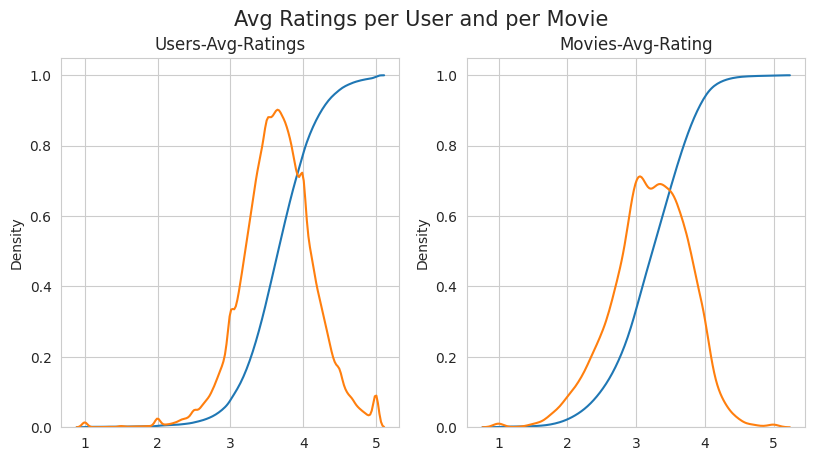

0:00:06.255712


In [38]:
start = datetime.now()
# draw pdfs for average rating per user and average
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=15)

ax1.set_title('Users-Avg-Ratings')
# get the list of average user ratings from the averages dictionary..
user_averages = [i for i in train_averages['user'].values()]
sns.distplot(user_averages, ax=ax1, hist=False,
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(user_averages, ax=ax1, hist=False,label='Pdf')

ax2.set_title('Movies-Avg-Rating')
# get the list of movie_average_ratings from the dictionary..
movie_averages = [j for j in train_averages['movie'].values()]
sns.distplot(movie_averages, ax=ax2, hist=False,
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(movie_averages, ax=ax2, hist=False, label='Pdf')

plt.show()
print(datetime.now() - start)

<h3> 3.3.8 Cold Start problem </h3>

<h4> 3.3.8.1 Cold Start problem with Users</h4>

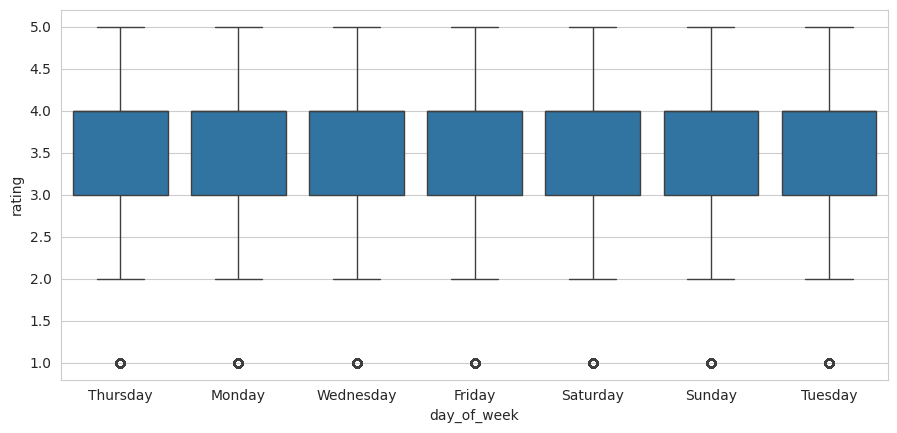

Time taken for plotting boxplot: 0:02:26.639550
Average ratings
------------------------------
day_of_week
Friday       3.585274
Monday       3.577250
Saturday     3.591791
Sunday       3.594144
Thursday     3.582463
Tuesday      3.574438
Wednesday    3.583751
Name: rating, dtype: float64


Sparse matrix found on disk, loading...
Time taken for sparse matrix operations: 0:00:03.203873
Sparsity of Train matrix: 99.83%


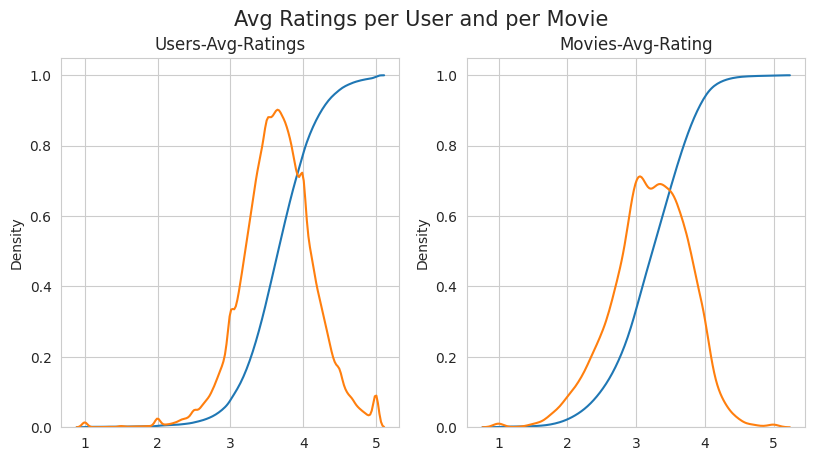

Time taken for density plots: 0:00:10.417136

Total number of Users  : 405041

Number of Users in Train data : 405041

No of Users that didn't appear in train data: 0 (0.0%)



In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from scipy import sparse

# Load the dataset
train_df = pd.read_csv("train.csv")

# Check if 'date' column exists and parse it if present
if 'date' in train_df.columns:
    train_df['date'] = pd.to_datetime(train_df['date'])
    train_df['day_of_week'] = train_df['date'].dt.day_name()

# Plotting boxplot for ratings by day of the week
if 'day_of_week' in train_df.columns:
    start = datetime.now()
    plt.figure(figsize=plt.figaspect(.45))
    sns.boxplot(y='rating', x='day_of_week', data=train_df)
    plt.show()
    print("Time taken for plotting boxplot:", datetime.now() - start)

# Calculate average ratings by day of the week
if 'day_of_week' in train_df.columns:
    avg_week_df = train_df.groupby(by=['day_of_week'])['rating'].mean()
    print("Average ratings")
    print("-" * 30)
    print(avg_week_df)
    print("\n")

# Load or create sparse matrix
start = datetime.now()
sparse_matrix_path = 'train_sparse_matrix.npz'

if os.path.isfile(sparse_matrix_path):
    print("Sparse matrix found on disk, loading...")
    train_sparse_matrix = sparse.load_npz(sparse_matrix_path)
else:
    print("Creating sparse matrix from the dataframe...")
    train_sparse_matrix = sparse.csr_matrix((train_df.rating.values, (train_df.user.values, train_df.movie.values)))
    sparse.save_npz(sparse_matrix_path, train_sparse_matrix)
    print("Sparse matrix saved to disk.")

print("Time taken for sparse matrix operations:", datetime.now() - start)

# Calculate sparsity of the train matrix
us, mv = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()
sparsity = (1 - (elem / (us * mv))) * 100
print("Sparsity of Train matrix: {:.2f}%".format(sparsity))

# Plotting PDFs and CDFs for average ratings per user and per movie
start = datetime.now()

# Assume 'train_averages' is a dictionary with keys 'user' and 'movie' containing dictionaries of user and movie average ratings respectively
train_averages = {
    'user': train_df.groupby('user')['rating'].mean().to_dict(),
    'movie': train_df.groupby('movie')['rating'].mean().to_dict()
}

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=15)

# User average ratings
ax1.set_title('Users-Avg-Ratings')
user_averages = list(train_averages['user'].values())
sns.kdeplot(user_averages, ax=ax1, cumulative=True, label='Cdf')
sns.kdeplot(user_averages, ax=ax1, label='Pdf')

# Movie average ratings
ax2.set_title('Movies-Avg-Rating')
movie_averages = list(train_averages['movie'].values())
sns.kdeplot(movie_averages, ax=ax2, cumulative=True, label='Cdf')
sns.kdeplot(movie_averages, ax=ax2, label='Pdf')

plt.show()
print("Time taken for density plots:", datetime.now() - start)

# Calculate user statistics
total_users = len(np.unique(train_df.user))
users_train = len(train_averages['user'])
new_users = total_users - users_train

print('\nTotal number of Users  :', total_users)
print('\nNumber of Users in Train data :', users_train)
print("\nNo of Users that didn\'t appear in train data: {} ({}%)\n".format(new_users, np.round((new_users / total_users) * 100, 2)))


<h4> 3.3.8.2 Cold Start problem with Movies</h4>

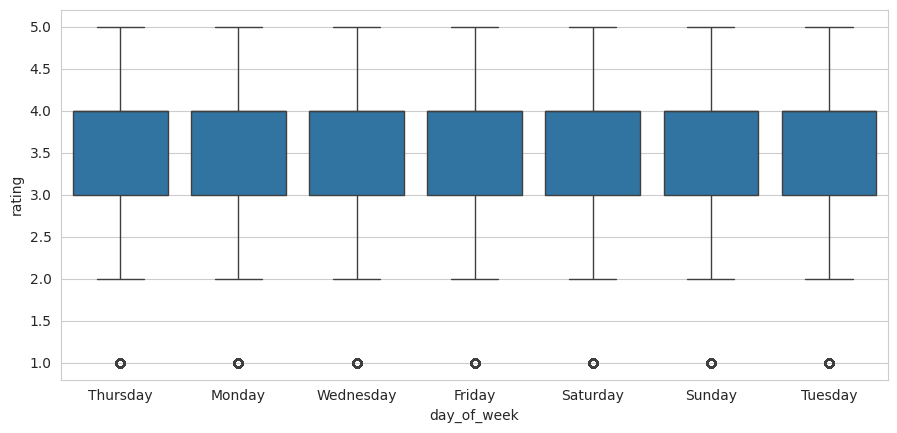

Time taken for plotting boxplot: 0:02:27.974064
Average ratings
------------------------------
day_of_week
Friday       3.585274
Monday       3.577250
Saturday     3.591791
Sunday       3.594144
Thursday     3.582463
Tuesday      3.574438
Wednesday    3.583751
Name: rating, dtype: float64


Sparse matrix found on disk, loading...
Time taken for sparse matrix operations: 0:00:03.213680
Sparsity of Train matrix: 99.83%


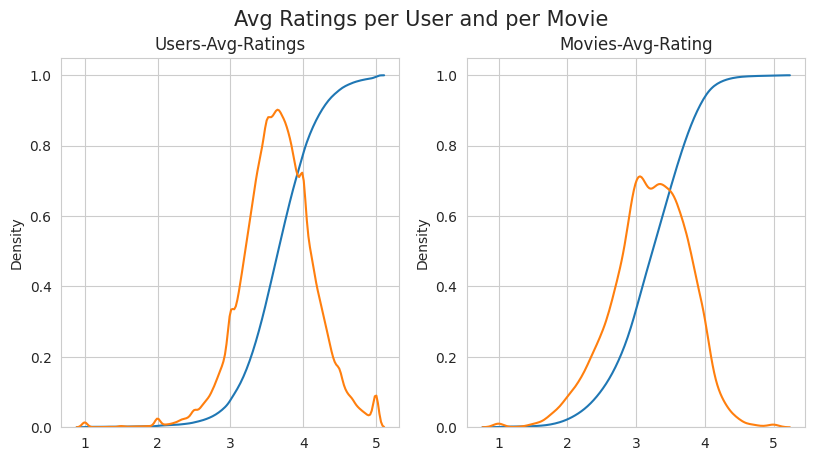

Time taken for density plots: 0:00:10.932675

Total number of Users  : 405041

Number of Users in Train data : 405041

No of Users that didn't appear in train data: 0 (0.0%)


Total number of Movies  : 17424

Number of Movies in Train data : 17424

No of Movies that didn't appear in train data: 0 (0.0%)



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from scipy import sparse

# Load the dataset
train_df = pd.read_csv("train.csv")

# Check if 'date' column exists and parse it if present
if 'date' in train_df.columns:
    train_df['date'] = pd.to_datetime(train_df['date'])
    train_df['day_of_week'] = train_df['date'].dt.day_name()

# Plotting boxplot for ratings by day of the week
if 'day_of_week' in train_df.columns:
    start = datetime.now()
    plt.figure(figsize=plt.figaspect(.45))
    sns.boxplot(y='rating', x='day_of_week', data=train_df)
    plt.show()
    print("Time taken for plotting boxplot:", datetime.now() - start)

# Calculate average ratings by day of the week
if 'day_of_week' in train_df.columns:
    avg_week_df = train_df.groupby(by=['day_of_week'])['rating'].mean()
    print("Average ratings")
    print("-" * 30)
    print(avg_week_df)
    print("\n")

# Load or create sparse matrix
start = datetime.now()
sparse_matrix_path = 'train_sparse_matrix.npz'

if os.path.isfile(sparse_matrix_path):
    print("Sparse matrix found on disk, loading...")
    train_sparse_matrix = sparse.load_npz(sparse_matrix_path)
else:
    print("Creating sparse matrix from the dataframe...")
    train_sparse_matrix = sparse.csr_matrix((train_df.rating.values, (train_df.user.values, train_df.movie.values)))
    sparse.save_npz(sparse_matrix_path, train_sparse_matrix)
    print("Sparse matrix saved to disk.")

print("Time taken for sparse matrix operations:", datetime.now() - start)

# Calculate sparsity of the train matrix
us, mv = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()
sparsity = (1 - (elem / (us * mv))) * 100
print("Sparsity of Train matrix: {:.2f}%".format(sparsity))

# Plotting PDFs and CDFs for average ratings per user and per movie
start = datetime.now()

# Assume 'train_averages' is a dictionary with keys 'user' and 'movie' containing dictionaries of user and movie average ratings respectively
train_averages = {
    'user': train_df.groupby('user')['rating'].mean().to_dict(),
    'movie': train_df.groupby('movie')['rating'].mean().to_dict()
}

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=15)

# User average ratings
ax1.set_title('Users-Avg-Ratings')
user_averages = list(train_averages['user'].values())
sns.kdeplot(user_averages, ax=ax1, cumulative=True, label='Cdf')
sns.kdeplot(user_averages, ax=ax1, label='Pdf')

# Movie average ratings
ax2.set_title('Movies-Avg-Rating')
movie_averages = list(train_averages['movie'].values())
sns.kdeplot(movie_averages, ax=ax2, cumulative=True, label='Cdf')
sns.kdeplot(movie_averages, ax=ax2, label='Pdf')

plt.show()
print("Time taken for density plots:", datetime.now() - start)

# Calculate user statistics
total_users = len(np.unique(train_df.user))
users_train = len(train_averages['user'])
new_users = total_users - users_train

print('\nTotal number of Users  :', total_users)
print('\nNumber of Users in Train data :', users_train)
print("\nNo of Users that didn\'t appear in train data: {} ({}%)\n".format(new_users, np.round((new_users / total_users) * 100, 2)))

# Calculate movie statistics
total_movies = len(np.unique(train_df.movie))
movies_train = len(train_averages['movie'])
new_movies = total_movies - movies_train

print('\nTotal number of Movies  :', total_movies)
print('\nNumber of Movies in Train data :', movies_train)
print("\nNo of Movies that didn\'t appear in train data: {} ({}%)\n".format(new_movies, np.round((new_movies / total_movies) * 100, 2)))


<h2> 3.4 Computing Similarity matrices </h2>

<h3> 3.4.1 Computing User-User Similarity matrix </h3>



1. Calculating User User Similarity_Matrix is __not very easy__(_unless you have huge Computing Power and lots of time_) because of number of. users being here.

    * System could crash or the program stops with **Memory Error**


<h4> 3.4.1.1 Trying with all dimensions (17k dimensions per user) </h4>

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from datetime import datetime

def compute_user_similarity(sparse_matrix, compute_for_few=False, top=100, verbose=False, verb_for_n_rows=20,
                            draw_time_taken=True):
    """
    Compute user-user similarity matrix using cosine similarity.

    Parameters:
    sparse_matrix (csr_matrix): The sparse matrix containing user-item interactions.
    compute_for_few (bool): If True, compute similarity for only a few users (for testing purposes).
    top (int): Number of top similar users to retain for each user.
    verbose (bool): If True, print progress information.
    verb_for_n_rows (int): Verbose information print frequency.
    draw_time_taken (bool): If True, draw a plot of time taken for each user.

    Returns:
    csr_matrix: Sparse matrix containing the user-user similarity scores.
    list: Time taken for computing similarities for each user.
    """
    no_of_users, _ = sparse_matrix.shape

    # Get the indices of non-zero rows (users) from the sparse matrix
    row_ind = sorted(set(sparse_matrix.nonzero()[0]))

    time_taken = []  # List to store time taken for finding similar users for each user
    rows, cols, data = [], [], []  # Lists to create sparse matrix

    if verbose:
        print("Computing top", top, "similarities for each user..")

    start = datetime.now()
    temp = 0

    for row in row_ind[:top] if compute_for_few else row_ind:
        temp += 1
        prev = datetime.now()

        # Compute similarity for the current user with all other users
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()

        # Get the indices of top 'N' most similar users
        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]

        # Add the top similarities to the lists
        rows.extend([row] * top)
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)

        time_taken.append(datetime.now().timestamp() - prev.timestamp())

        if verbose and temp % verb_for_n_rows == 0:
            print("Computing done for {} users [time elapsed: {}]".format(temp, datetime.now() - start))

    # Create and return the sparse matrix from the computed similarities
    if verbose:
        print('Creating sparse matrix from the computed similarities')

    if draw_time_taken:
        plt.plot(time_taken, label='Time taken for each user')
        plt.plot(np.cumsum(time_taken), label='Total time')
        plt.legend(loc='best')
        plt.xlabel('User')
        plt.ylabel('Time (seconds)')
        plt.show()

    return sparse.csr_matrix((data, (rows, cols)), shape=(no_of_users, no_of_users)), time_taken


Computing top 100 similarities for each user..
Computing done for 20 users [time elapsed: 0:01:00.722150]
Computing done for 40 users [time elapsed: 0:02:01.473867]
Computing done for 60 users [time elapsed: 0:03:00.909237]
Computing done for 80 users [time elapsed: 0:04:00.540604]
Computing done for 100 users [time elapsed: 0:05:00.786274]
Creating sparse matrix from the computed similarities


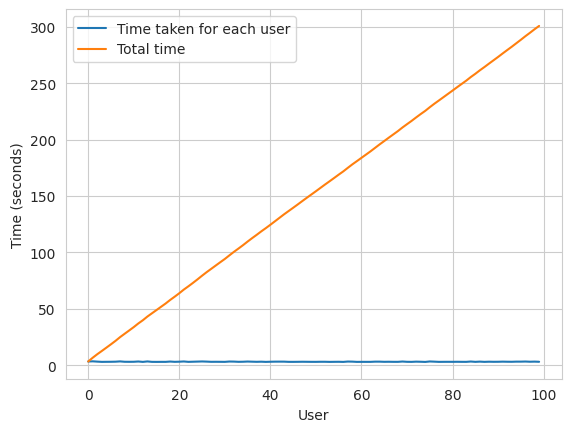

----------------------------------------------------------------------------------------------------
Time taken: 0:05:06.764055


In [47]:
from datetime import datetime

# Start timing the computation
start = datetime.now()

# Compute the user-user similarity sparse matrix
u_u_sim_sparse, _ = compute_user_similarity(train_sparse_matrix, compute_for_few=True, top=100, verbose=True)

# Print a separator line for clarity in the output
print("-" * 100)

# Print the total time taken for the computation
print("Time taken:", datetime.now() - start)


<h4> 3.4.1.2 Trying with reduced dimensions (Using TruncatedSVD for dimensionality reduction of user vector)</h4>

* We have  **405,041 users** in out training set and computing similarities between them..( **17K dimensional vector..**) is time consuming..


- From above plot, It took roughly __8.88 sec__ for computing simlilar users for __one user__
    
    
- We have __405,041 users__ with us in training set.


- ${ 405041 \times 8.88 = 3596764.08  \sec } =  59946.068 \min = 999.101133333 \text{ hours}
= 41.629213889 \text{ days}...$

    - Even if we run on 4 cores parallelly (a typical system now a days), It will still take almost __10 and 1/2__ days.
    
 IDEA:  Instead, we will try to reduce the dimentsions using SVD, so that __it might__ speed up the process...

In [48]:
from datetime import datetime
from sklearn.decomposition import TruncatedSVD

# Start timing the computation
start = datetime.now()

# Initialize the Truncated SVD algorithm with specified parameters
# n_components: Number of singular values and vectors to compute
# algorithm: The algorithm to use for the decomposition ('randomized' for efficiency)
# random_state: Seed for the random number generator to ensure reproducibility
netflix_svd = TruncatedSVD(n_components=500, algorithm='randomized', random_state=15)

# Fit the model and apply the dimensionality reduction on the train_sparse_matrix
trunc_svd = netflix_svd.fit_transform(train_sparse_matrix)

# Print the total time taken for the computation
print(datetime.now() - start)


0:12:38.554728


Here,


- $\sum \longleftarrow$ (netflix\_svd.**singular\_values\_** )


- $\bigvee^T \longleftarrow$ (netflix\_svd.**components_**)


- $\bigcup$ is not returned. instead **Projection_of_X** onto the new vectorspace is returned.


- It uses **randomized svd** internally, which returns **All 3 of them saperately**. Use that instead..

In [49]:
expl_var = np.cumsum(netflix_svd.explained_variance_ratio_)

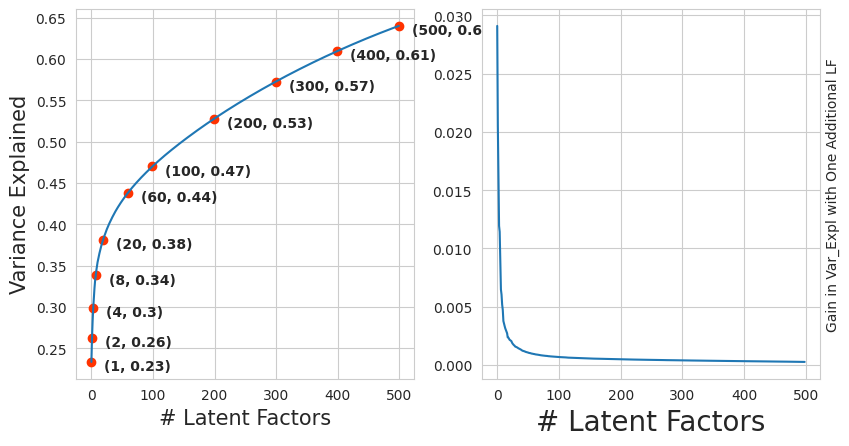

In [51]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots arranged in one row and two columns
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))

# First subplot: Plot variance explained by latent factors
ax1.set_ylabel("Variance Explained", fontsize=15)  # Set y-axis label
ax1.set_xlabel("# Latent Factors", fontsize=15)    # Set x-axis label
ax1.plot(expl_var)                                 # Plot the variance explained

# Annotate some specific points on the plot for clarity
ind = [1, 2, 4, 8, 20, 60, 100, 200, 300, 400, 500]  # Indices to annotate
ax1.scatter(x=[i-1 for i in ind], y=expl_var[[i-1 for i in ind]], c='#ff3300')  # Scatter plot for annotations
for i in ind:
    ax1.annotate(text="({}, {})".format(i, np.round(expl_var[i-1], 2)),  # Provide the 'text' argument here
                 xy=(i-1, expl_var[i-1]),
                 xytext=(i+20, expl_var[i-1] - 0.01),
                 fontweight='bold')  # Annotate the points

# Second subplot: Plot change in variance explained by each additional latent factor
change_in_expl_var = [expl_var[i+1] - expl_var[i] for i in range(len(expl_var)-1)]  # Calculate change in variance explained
ax2.plot(change_in_expl_var)  # Plot the changes

# Set labels for the second subplot
ax2.set_ylabel("Gain in Var_Expl with One Additional LF", fontsize=10)
ax2.yaxis.set_label_position("right")
ax2.set_xlabel("# Latent Factors", fontsize=20)

# Show the plot
plt.show()

In [52]:
for i in ind:
    print("({}, {})".format(i, np.round(expl_var[i-1], 2)))

(1, 0.23)
(2, 0.26)
(4, 0.3)
(8, 0.34)
(20, 0.38)
(60, 0.44)
(100, 0.47)
(200, 0.53)
(300, 0.57)
(400, 0.61)
(500, 0.64)



> I think 500 dimensions is good enough

---------

-  By just taking __(20 to 30)__ latent factors, explained variance that we could get is __20 %__.

- To take it to __60%__, we have to take  __almost 400 latent factors__. It is not fare.



- It basically is the __gain of variance explained__, if we ___add one additional latent factor to it.___


- By adding one by one latent factore too it, the ___gain in expained variance__ with that addition is decreasing. (Obviously, because they are sorted that way).
- ___LHS Graph___:
    - __x__ --- ( No of latent factos ),
    - __y__ --- ( The variance explained by taking x latent factors)



- __More decrease in the line (RHS graph) __:
    - We  are getting more expained variance than before.
- __Less decrease in that line (RHS graph)__  :
    - We are not getting benifitted from adding latent factor furthur. This is what is shown in the plots.


- ___RHS Graph___:
    - __x__ --- ( No of latent factors ),
    - __y__ --- ( Gain n Expl_Var by taking one additional latent factor)

In [53]:
from datetime import datetime

# Start timing the operation
start = datetime.now()

# Project the original user-movie matrix into a 500-dimensional space using the SVD components
# 'netflix_svd.components_.T' contains the right singular vectors from the SVD decomposition
# 'train_sparse_matrix' is the original user-movie matrix
trunc_matrix = train_sparse_matrix.dot(netflix_svd.components_.T)

# Print the time taken for the projection
print(datetime.now() - start)


0:00:24.486072


In [54]:
type(trunc_matrix), trunc_matrix.shape

(numpy.ndarray, (2649430, 500))

* Let's convert this to actual sparse matrix and store it for future purposes

In [55]:
import os
from scipy import sparse

# Check if the file 'trunc_sparse_matrix.npz' exists
if not os.path.isfile('trunc_sparse_matrix.npz'):
    # If the file does not exist, create a sparse matrix 'trunc_sparse_matrix' from 'trunc_matrix'
    trunc_sparse_matrix = sparse.csr_matrix(trunc_matrix)
    # Save the sparse matrix to a file named 'trunc_sparse_matrix.npz'
    sparse.save_npz('trunc_sparse_matrix.npz', trunc_sparse_matrix)
else:
    # If the file already exists, load the sparse matrix from the file
    trunc_sparse_matrix = sparse.load_npz('trunc_sparse_matrix.npz')


In [56]:
trunc_sparse_matrix.shape

(2649430, 500)

Computing top 50 similarities for each user..
Computing done for 10 users [time elapsed: 0:01:05.713676]
Computing done for 20 users [time elapsed: 0:02:11.082529]
Computing done for 30 users [time elapsed: 0:03:16.487842]
Computing done for 40 users [time elapsed: 0:04:22.557276]
Computing done for 50 users [time elapsed: 0:05:27.929545]
Creating sparse matrix from the computed similarities


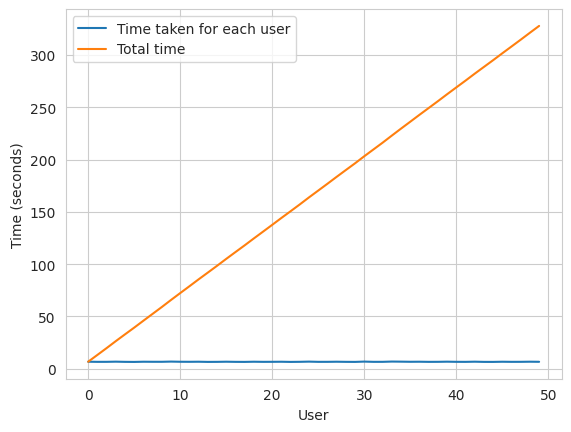

--------------------------------------------------
Time taken: 0:05:42.450122


In [57]:
# Importing necessary libraries
from datetime import datetime

# Start measuring the time
start = datetime.now()

# Compute the user similarity matrix
# compute_user_similarity() is a function that computes the user similarity matrix
# trunc_sparse_matrix: the input sparse matrix for which user similarity is computed
# compute_for_few=True: compute the similarity for a subset of users (for efficiency)
# top=50: compute the top 50 most similar users for each user
# verbose=True: print progress information during computation
# verb_for_n_rows=10: print verbose information for every 10 rows processed
trunc_u_u_sim_matrix, _ = compute_user_similarity(trunc_sparse_matrix, compute_for_few=True, top=50, verbose=True, verb_for_n_rows=10)

# Print a line of dashes for visual separation
print("-"*50)

# Print the total time taken for the computation
print("Time taken:", datetime.now()-start)



- from above plot, It took almost __12.18__ for computing simlilar users for __one user__
    
    
- We have __405041 users__ with us in training set.


- ${ 405041 \times 12.18 ==== 4933399.38 \sec } ====  82223.323 \min ==== 1370.388716667 \text{ hours}
==== 57.099529861 \text{ days}...$

    - Even we run on 4 cores parallelly (a typical system now a days), It will still take almost __(14 - 15) __ days.


__Is there any other way to compute user user similarity..??__

-An alternative is to compute similar users for a particular user,  whenenver required (**ie., Run time**)
    - We maintain a binary Vector for users, which tells us whether we already computed or not..
    - ***If not*** :
        - Compute top (let's just say, 1000) most similar users for this given user, and add this to our data structure, so that we can just access it(similar users) without recomputing it again.
        -
    - ***If It is already Computed***:
        - Just get it directly from our data structure, which has that information.
        - In production time, We might have to recompute similarities, if it is computed a long time ago. Because user preferences changes over time. If we could maintain some kind of Timer, which when expires, we have to update it ( recompute it ).
        -
    - ***Which data structure to use:***
        - It is purely implementation dependant.
        - One simple method is to maintain a **Dictionary Of Dictionaries**.
            -
            - **key    :** _userid_
            - __value__: _Again a dictionary_
                - __key__  : _Similar User_
                - __value__: _Similarity Value_

<h3> 3.4.2 Computing Movie-Movie Similarity matrix </h3>

In [58]:
# Importing necessary libraries
from datetime import datetime
import os
from scipy.sparse import save_npz, load_npz
from sklearn.metrics.pairwise import cosine_similarity

# Start measuring the time
start = datetime.now()

# Check if the file 'm_m_sim_sparse.npz' exists
if not os.path.isfile('m_m_sim_sparse.npz'):
    print("It seems you don't have that file. Computing movie_movie similarity...")
    # Compute the cosine similarity between movies based on the transpose of the train sparse matrix
    m_m_sim_sparse = cosine_similarity(X=train_sparse_matrix.T, dense_output=False)
    print("Done..")
    # Save the computed similarity matrix to a file for future use
    print("Saving it to disk without the need of re-computing it again.. ")
    save_npz("m_m_sim_sparse.npz", m_m_sim_sparse)
    print("Done..")
else:
    print("It is there, We will get it.")
    # Load the pre-computed similarity matrix from the file
    m_m_sim_sparse = load_npz("m_m_sim_sparse.npz")
    print("Done ...")

# Print the dimensions of the similarity matrix
print("It's a ", m_m_sim_sparse.shape, " dimensional matrix")

# Print the total time taken for the computation
print(datetime.now() - start)


It seems you don't have that file. Computing movie_movie similarity...
Done..
Saving it to disk without the need of re-computing it again.. 
Done..
It's a  (17771, 17771)  dimensional matrix
0:08:12.584485


In [59]:
m_m_sim_sparse.shape

(17771, 17771)

- Even though we have similarity measure of each movie, with all other movies, We generally don't care much about least similar movies.


- Most of the times, only top_xxx similar items matters. It may be 10 or 100.


- We take only those top similar movie ratings and store them  in a saperate dictionary.

In [60]:
movie_ids = np.unique(m_m_sim_sparse.nonzero()[1])

In [61]:
# Start measuring the time
start = datetime.now()

# Dictionary to store top similar movies for each movie
similar_movies = dict()

# Iterate over each movie ID
for movie in movie_ids:
    # Compute the top similar movies for the current movie
    sim_movies = m_m_sim_sparse[movie].toarray().ravel().argsort()[::-1][1:]
    similar_movies[movie] = sim_movies[:100]

# Print the total time taken for the computation
print(datetime.now() - start)

# Print the top similar movies for movie with ID 15
similar_movies[15]


0:00:10.800684


array([ 8279,  8013, 16528,  5927, 13105, 12049,  4424, 10193, 17590,
        4549,  3755,   590, 14059, 15144, 15054,  9584,  9071,  6349,
       16402,  3973,  1720,  5370, 16309,  9376,  6116,  4706,  2818,
        9566,  7328, 17710, 17139,  6426,  1416,  5720,   778,  5500,
       15984, 15331, 15188,  2534,  2450, 14308, 16331,  5452, 15301,
        8323, 13213, 10597,  7068,   164, 12979,  9802,   376, 13013,
        8003, 10199,  3338, 15390,  9688, 16455, 11730,  4513,   598,
       12762,  2187,   509,  5865,  9166, 17115, 16334,  1942,  7282,
       17584,  4376,  8988,  8873,  5921,  2716, 14679, 11947, 11981,
        4649,   565, 12954, 10788, 10220, 10963,  9427,  1690,  5107,
        7859,  5969,  1510,  2429,   847,  7845,  6410, 13931,  9840,
        3706])

<h3> 3.4.3 Finding most similar movies using similarity matrix </h3>


__ Does Similarity really works as the way we expected...? __ <br>
_Let's pick some random movie and check for its similar movies...._

In [70]:
# First Let's load the movie details into soe dataframe..
# movie details are in 'netflix/movie_titles.csv'

movie_titles = pd.read_csv("movie_titles.csv", sep=',', header = None,
                           names=['movie_id', 'year_of_release', 'title'],
                           index_col = 'movie_id', encoding = "ISO-8859-1",
                           on_bad_lines='warn') # Add error handling

movie_titles.head()

Skipping line 72: expected 3 fields, saw 4
Skipping line 264: expected 3 fields, saw 5
Skipping line 350: expected 3 fields, saw 4
Skipping line 366: expected 3 fields, saw 4
Skipping line 394: expected 3 fields, saw 4
Skipping line 466: expected 3 fields, saw 4
Skipping line 582: expected 3 fields, saw 4
Skipping line 600: expected 3 fields, saw 4
Skipping line 670: expected 3 fields, saw 4
Skipping line 672: expected 3 fields, saw 4
Skipping line 729: expected 3 fields, saw 4
Skipping line 776: expected 3 fields, saw 4
Skipping line 827: expected 3 fields, saw 4
Skipping line 834: expected 3 fields, saw 4
Skipping line 891: expected 3 fields, saw 4
Skipping line 913: expected 3 fields, saw 4
Skipping line 944: expected 3 fields, saw 4
Skipping line 973: expected 3 fields, saw 4
Skipping line 1010: expected 3 fields, saw 4
Skipping line 1015: expected 3 fields, saw 4
Skipping line 1058: expected 3 fields, saw 4
Skipping line 1095: expected 3 fields, saw 4
Skipping line 1170: expected 

,year_of_release,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


Similar Movies

In [253]:
mv_id = 67

print("\nMovie ----->",movie_titles.loc[mv_id].values[1])

print("\nIt has {} Ratings from users.".format(train_sparse_matrix[:,mv_id].getnnz()))

print("\nWe have {} movies which are similarto this  and we will get only top most..".format(m_m_sim_sparse[:,mv_id].getnnz()))


Movie -----> Vampire Journals

It has 270 Ratings from users.

We have 17284 movies which are similarto this  and we will get only top most..


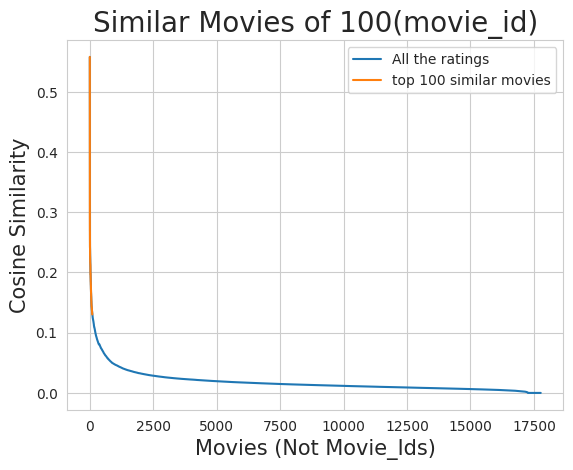

In [84]:
# # Get the similarity scores between the movie with ID 'mv_id' and all other movies
similarities = m_m_sim_sparse[mv_id].toarray().ravel()

# # Sort the similarity scores in descending order and get the indices of the top similar movies
similar_indices = similarities.argsort()[::-1][1:]

# # Get the similarity scores of the top similar movies
similarities[similar_indices]

# # Define sim_indices (Assuming you want to plot all similarities)
sim_indices = similarities.argsort()[::-1][1:] # It will sort and reverse the array and ignore its similarity (ie.,1)
                                               # and return its indices(movie_ids)


plt.plot(similarities[sim_indices], label='All the ratings')
plt.plot(similarities[sim_indices[:100]], label='top 100 similar movies')
plt.title("Similar Movies of {}(movie_id)".format(mv_id), fontsize=20)
plt.xlabel("Movies (Not Movie_Ids)", fontsize=15)
plt.ylabel("Cosine Similarity",fontsize=15)
plt.legend()
plt.show()

In [254]:
# __Top 10 similar movies__
# Filter sim_indices to only include valid movie IDs
valid_indices = [i for i in sim_indices[:10] if i in movie_titles.index]

# Access movie titles using valid indices
movie_titles.loc[valid_indices]

,year_of_release,title
movie_id,,
12217,1994.0,One Arm Hero
8028,1993.0,White Lotus Cult
8056,1993.0,The 13 Cold-Blooded Eagles
14394,1999.0,Fist Power
10323,1986.0,The Shaolin Invincibles
7727,1988.0,Dragon Family
7319,1983.0,99 Cycling Swords
10862,1992.0,First Shot


 <h1> 4.  Machine Learning Models </h1>

In [87]:
def get_sample_sparse_matrix(sparse_matrix, no_users, no_movies, path, verbose=True):
    """
    Get a sampled sparse matrix from the given sparse_matrix or create and store one at the specified path.

    Args:
    - sparse_matrix (csr_matrix): The original sparse matrix from which to sample.
    - no_users (int): The number of users to sample.
    - no_movies (int): The number of movies to sample.
    - path (str): The path to store the sampled matrix.
    - verbose (bool): Whether to print verbose output.

    Returns:
    - sample_sparse_matrix (csr_matrix): The sampled sparse matrix.
    """

    # Get (row, col) and (rating) tuple from sparse_matrix
    row_ind, col_ind, ratings = sparse.find(sparse_matrix)
    users = np.unique(row_ind)
    movies = np.unique(col_ind)

    # Print information about the original matrix
    if verbose:
        print("Original Matrix: (users, movies) -- ({} {})".format(len(users), len(movies)))
        print("Original Matrix: Ratings -- {}\n".format(len(ratings)))

    # Ensure reproducibility by setting seed and pick without replacement
    np.random.seed(15)
    sample_users = np.random.choice(users, no_users, replace=False)
    sample_movies = np.random.choice(movies, no_movies, replace=False)
    # Get the boolean mask for these sampled_items in original row/col_inds
    mask = np.logical_and(np.isin(row_ind, sample_users), np.isin(col_ind, sample_movies))

    # Create the sampled sparse matrix
    sample_sparse_matrix = sparse.csr_matrix((ratings[mask], (row_ind[mask], col_ind[mask])),
                                             shape=(max(sample_users) + 1, max(sample_movies) + 1))

    # Print information about the sampled matrix
    if verbose:
        print("Sampled Matrix: (users, movies) -- ({} {})".format(len(sample_users), len(sample_movies)))
        print("Sampled Matrix: Ratings --", format(ratings[mask].shape[0]))

    # Save the sampled matrix to disk
    print('Saving it into disk for further usage..')
    sparse.save_npz(path, sample_sparse_matrix)
    if verbose:
        print('Done..\n')

    return sample_sparse_matrix


<h2> 4.1 Sampling Data </h2>

<h3>4.1.1 Build sample train data from the train data</h3>

In [89]:
start = datetime.now()
path = "sample_train_sparse_matrix.npz"
if os.path.isfile(path):
    # If the file is present in the current directory, load it from disk
    print("It is present in your pwd, getting it from disk....")
    sample_train_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else:
    # If the file is not present, create a new sample sparse matrix
    sample_train_sparse_matrix = get_sample_sparse_matrix(train_sparse_matrix, no_users=10000, no_movies=1000,
                                             path=path)
    # Save the new sample sparse matrix to disk for future use
    print("Saved the new sample sparse matrix to disk.")
print(datetime.now() - start)


Original Matrix: (users, movies) -- (405041 17424)
Original Matrix: Ratings -- 80384405

Sampled Matrix: (users, movies) -- (10000 1000)
Sampled Matrix: Ratings -- 129286
Saving it into disk for further usage..
Done..

Saved the new sample sparse matrix to disk.
0:00:23.614114


<h3>4.1.2 Build sample test data from the test data</h3>

In [90]:
start = datetime.now()

path = "sample_test_sparse_matrix.npz"
if os.path.isfile(path):
    # If the file is present in the current directory, load it from disk
    print("It is present in your pwd, getting it from disk....")
    sample_test_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else:
    # If the file is not present, create a new sample sparse matrix
    sample_test_sparse_matrix = get_sample_sparse_matrix(test_sparse_matrix, no_users=5000, no_movies=500,
                                                 path=path)
    # Save the new sample sparse matrix to disk for future use
    print("Saved the new sample sparse matrix to disk.")
print(datetime.now() - start)


Original Matrix: (users, movies) -- (349312 17757)
Original Matrix: Ratings -- 20096102

Sampled Matrix: (users, movies) -- (5000 500)
Sampled Matrix: Ratings -- 7333
Saving it into disk for further usage..
Done..

Saved the new sample sparse matrix to disk.
0:00:05.863884


<h2>4.2 Finding Global Average of all movie ratings, Average rating per User, and Average rating per Movie (from sampled train)</h2>

In [91]:
sample_train_averages = dict()

<h3>4.2.1 Finding Global Average of all movie ratings</h3>

In [92]:
# get the global average of ratings in our train set.
global_average = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
sample_train_averages['global'] = global_average
sample_train_averages

{'global': 3.581679377504138}

<h3>4.2.2 Finding Average rating per User</h3>

In [93]:
# Calculate and assign the average ratings of users to the 'sample_train_averages' dictionary
sample_train_averages['user'] = get_average_ratings(sample_train_sparse_matrix, of_users=True)

# Print the average rating of user 1515220
print('\nAverage rating of user 1515220:', sample_train_averages['user'][1515220])



Average rating of user 1515220: 3.9655172413793105


<h3>4.2.3 Finding Average rating per Movie</h3>

In [94]:
# Calculate and assign the average ratings of movies to the 'sample_train_averages' dictionary
sample_train_averages['movie'] = get_average_ratings(sample_train_sparse_matrix, of_users=False)

# Print the average rating of movie 15153
print('\nAverage rating of movie 15153:', sample_train_averages['movie'][15153])



Average rating of movie 15153: 2.6458333333333335


<h2> 4.3 Featurizing data </h2>

In [95]:
print('\n No of ratings in Our Sampled train matrix is : {}\n'.format(sample_train_sparse_matrix.count_nonzero()))
print('\n No of ratings in Our Sampled test  matrix is : {}\n'.format(sample_test_sparse_matrix.count_nonzero()))



 No of ratings in Our Sampled train matrix is : 129286


 No of ratings in Our Sampled test  matrix is : 7333



<h3> 4.3.1 Featurizing data for regression problem </h3>

<h4> 4.3.1.1 Featurizing train data </h4>

In [141]:
# get users, movies and ratings from our samples train sparse matrix
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_train_sparse_matrix)

In [147]:
# get users, movies and ratings from our samples train sparse matrix
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_train_sparse_matrix)

############################################################
# It took me almost 12 hours to prepare this train dataset.#
############################################################
start = datetime.now()
if os.path.isfile('reg_train.csv'):
    print("File already exists you don't have to prepare again..." )
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
    with open('reg_train.csv', mode='w') as reg_data_file:
        count = 0
        for idx in range(len(sample_train_ratings)):
            user = sample_train_users[idx]
            movie = sample_train_movies[idx]
            rating = sample_train_ratings[idx]

            st = datetime.now()
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"
            user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar users for this movie
            top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))

            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"
            movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings)))

            #-----------------prepare the row to be stored in a file-----------------#
            row = list()
            row.append(user)
            row.append(movie)
            # Now add the other features to this data...
            row.append(sample_train_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(sample_train_averages['user'][user])
            # Avg_movie rating
            row.append(sample_train_averages['movie'][movie])

            # finally, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')
            if (count)%10000 == 0:
                print("Done for {} rows----- {}".format(count, datetime.now() - start))

print(datetime.now() - start)


preparing 129286 tuples for the dataset..

Done for 10000 rows----- 1:00:51.526504
Done for 20000 rows----- 1:59:53.330584
Done for 30000 rows----- 2:47:48.681098
Done for 40000 rows----- 3:40:07.325458
Done for 50000 rows----- 4:28:24.713282
Done for 60000 rows----- 5:16:44.974647
Done for 70000 rows----- 6:07:01.260243
Done for 80000 rows----- 6:54:59.992892
Done for 90000 rows----- 7:53:35.068097
Done for 100000 rows----- 8:52:42.494116
Done for 110000 rows----- 9:51:09.299217
Done for 120000 rows----- 10:49:53.946595
11:44:08.676624


__Reading from the file to make a Train_dataframe__

In [148]:
reg_train = pd.read_csv('reg_train.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)
reg_train.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,692,5317,3.581679,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000000,3.390205,4
1,692,14621,3.581679,4.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.000000,4.326983,4
2,1179,2239,3.581679,5.0,3.0,3.0,2.0,2.0,3.0,5.0,4.0,3.0,4.0,3.666667,2.833333,5
3,1179,4352,3.581679,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,3.0,3.666667,3.073684,3
4,1179,5317,3.581679,3.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,3.0,4.0,3.666667,3.390205,3


-----------------------

- __GAvg__ : Average rating of all the ratings


- __Similar users rating of this movie__:
    - sur1, sur2, sur3, sur4, sur5 ( top 5 similar users who rated that movie.. )
    


- __Similar movies rated by this user__:
    - smr1, smr2, smr3, smr4, smr5 ( top 5 similar movies rated by this movie.. )


- __UAvg__ : User's Average rating


- __MAvg__ : Average rating of this movie


- __rating__ : Rating of this movie by this user.

-----------------------

<h4> 4.3.1.2 Featurizing test data </h4>

In [149]:
# get users, movies and ratings from the Sampled Test
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(sample_test_sparse_matrix)
sample_train_averages['global']

3.581679377504138

In [150]:
start = datetime.now()

if os.path.isfile('reg_test.csv'):
    print("It is already created...")
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_test_ratings)))
    with open('reg_test.csv', mode='w') as reg_data_file:
        count = 0
        for i in range(len(sample_test_ratings)):
            user = sample_test_users[i]
            movie = sample_test_movies[i]
            rating = sample_test_ratings[i]
            st = datetime.now()

            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            #print(user, movie)
            try:
                # compute the similar Users of the "user"
                user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
                top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar users for this movie
                top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
                # we will make it's length "5" by adding movie averages to .
                top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
                # print(top_sim_users_ratings, end="--")

            except (IndexError, KeyError):
                # It is a new User or new Movie or there are no ratings for given user for top similar movies...
                ########## Cold STart Problem ##########
                top_sim_users_ratings.extend([sample_train_averages['global']]*(5 - len(top_sim_users_ratings)))
                #print(top_sim_users_ratings)
            except:
                print(user, movie)
                # we just want KeyErrors to be resolved. Not every Exception...
                raise

            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            try:
                # compute the similar movies of the "movie"
                movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
                top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar movie rated by this user..
                top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
                # we will make it's length "5" by adding user averages to.
                top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings)))
                #print(top_sim_movies_ratings)
            except (IndexError, KeyError):
                #print(top_sim_movies_ratings, end=" : -- ")
                top_sim_movies_ratings.extend([sample_train_averages['global']]*(5-len(top_sim_movies_ratings)))
                #print(top_sim_movies_ratings)
            except :
                raise

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            # add user and movie name first
            row.append(user)
            row.append(movie)
            row.append(sample_train_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            try:
                row.append(sample_train_averages['user'][user])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            # Avg_movie rating
            try:
                row.append(sample_train_averages['movie'][movie])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            #print(','.join(map(str, row)))
            reg_data_file.write('\n')
            if (count)%1000 == 0:
                #print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))
    print("",datetime.now() - start)


preparing 7333 tuples for the dataset..

Done for 1000 rows----- 0:02:18.065603
Done for 2000 rows----- 0:04:34.683426
Done for 3000 rows----- 0:07:01.370766
Done for 4000 rows----- 0:09:15.882852
Done for 5000 rows----- 0:11:34.335470
Done for 6000 rows----- 0:13:53.418572
Done for 7000 rows----- 0:16:12.169961
 0:16:58.306822


In [197]:
#__Reading from the file to make a test dataframe __
reg_test_df = pd.read_csv('reg_test.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'], header=None)
reg_test_df.head(10)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,7,13072,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5
1,126,3418,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5
2,268,4266,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5
3,268,5727,3.581679,5.000000,3.000000,3.000000,4.000000,1.000000,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.609259,5
4,268,11740,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5
5,1809,705,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4
6,1809,1140,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3
7,1809,2533,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3
8,1809,3418,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3
9,1809,4011,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4


-----------------------

- __GAvg__ : Average rating of all the ratings


- __Similar users rating of this movie__:
    - sur1, sur2, sur3, sur4, sur5 ( top 5 simiular users who rated that movie.. )
    


- __Similar movies rated by this user__:
    - smr1, smr2, smr3, smr4, smr5 ( top 5 simiular movies rated by this movie.. )


- __UAvg__ : User AVerage rating


- __MAvg__ : Average rating of this movie


- __rating__ : Rating of this movie by this user.

-----------------------

<h3> 4.3.2 Transforming data for Surprise models</h3>

In [268]:
from surprise import Reader, Dataset

- We can't give raw data (movie, user, rating) to train the model in Surprise library.


- They have a saperate format for TRAIN and TEST data, which will be useful for training the models like SVD, KNNBaseLineOnly....etc..,in Surprise.


- We can form the trainset from a file, or from a Pandas  DataFrame.
http://surprise.readthedocs.io/en/stable/getting_started.html#load-dom-dataframe-py

In [269]:
# It is to specify how to read the dataframe.
# for our dataframe, we don't have to specify anything extra..
reader = Reader(rating_scale=(1,5))

# create the traindata from the dataframe...
train_data = Dataset.load_from_df(reg_train[['user', 'movie', 'rating']], reader)

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset()



<h4> 4.3.2.2 Transforming test data </h4>


- Testset is just a list of (user, movie, rating) tuples. (Order in the tuple is impotant)

In [270]:
# Assuming reg_test_df is a pandas DataFrame with 'user', 'movie', and 'rating' columns
users = reg_test_df['user'].values
movies = reg_test_df['movie'].values
ratings = reg_test_df['rating'].values

# Create the test set as a list of tuples
testset = [(users[i], movies[i], ratings[i]) for i in range(len(users))]

# Display the first 3 tuples in the testset
print(testset[:3])


[(7, 13072, 5), (126, 3418, 5), (268, 4266, 5)]


<h2> 4.4 Applying Machine Learning models </h2>

-  Global dictionary that stores rmse and mape for all the models....

    - It stores the metrics in a dictionary of dictionaries

    > __keys__ : model names(string)

    > __value__: dict(__key__ : metric, __value__ : value )

In [271]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

 > __Utility functions for running regression models__

In [272]:
# to get rmse and mape given actual and predicted ratings..
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

###################################################################
def run_xgboost(algo, x_train, y_train, x_test, y_test, verbose=True):
    """
    It will return train_results and test_results
    """

    # Dictionaries for storing train and test results
    train_results = dict()
    test_results = dict()

    # Fit the model
    print('Training the model...')
    start = datetime.now()
    algo.fit(x_train, y_train, eval_metric='rmse')
    print('Done. Time taken: {}\n'.format(datetime.now() - start))
    print('Done\n')

    # Get predictions from the trained model on train data
    print('Evaluating the model with TRAIN data...')
    start = datetime.now()
    y_train_pred = algo.predict(x_train)
    # Get the RMSE and MAPE of train data
    rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)

    # Store the results in train_results dictionary
    train_results = {
        'rmse': rmse_train,
        'mape': mape_train,
        'predictions': y_train_pred
    }

    # Get test data predictions and compute RMSE and MAPE
    print('Evaluating Test data...')
    y_test_pred = algo.predict(x_test)
    rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
    # Store them in our test results dictionary
    test_results = {
        'rmse': rmse_test,
        'mape': mape_test,
        'predictions': y_test_pred
    }

    if verbose:
        print('\nTEST DATA')
        print('-' * 30)
        print('RMSE: ', rmse_test)
        print('MAPE: ', mape_test)

    # Return train and test results
    return train_results, test_results



> __Utility functions for Surprise modes__

In [273]:
import numpy as np
import random
from datetime import datetime

# Ensure reproducibility
my_seed = 15
random.seed(my_seed)
np.random.seed(my_seed)

# Get actual and predicted ratings from predictions
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    return actual, pred

# Calculate RMSE and MAPE from predictions
def get_errors(predictions):
    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual) ** 2))
    mape = np.mean(np.abs((pred - actual) / actual)) * 100
    return rmse, mape

# Run the Surprise algorithm and return train and test results
def run_surprise(algo, trainset, testset, verbose=True):
    start = datetime.now()

    # Train the algorithm
    print('Training the model...')
    algo.fit(trainset)
    print(f'Done. Time taken: {datetime.now() - start}\n')

    # Evaluate on train data
    print('Evaluating the model with TRAIN data...')
    train_preds = algo.test(trainset.build_testset())
    train_rmse, train_mape = get_errors(train_preds)
    train_results = {
        'rmse': train_rmse,
        'mape': train_mape,
        'predictions': get_ratings(train_preds)[1]
    }
    if verbose:
        print(f"Train Data\n{'-'*15}\nRMSE: {train_rmse}\nMAPE: {train_mape}\n")

    # Evaluate on test data
    print('Evaluating the model with TEST data...')
    test_preds = algo.test(testset)
    test_rmse, test_mape = get_errors(test_preds)
    test_results = {
        'rmse': test_rmse,
        'mape': test_mape,
        'predictions': get_ratings(test_preds)[1]
    }
    if verbose:
        print(f"Test Data\n{'-'*15}\nRMSE: {test_rmse}\nMAPE: {test_mape}\n")

    print(f"\n{'-'*45}\nTotal time taken to run this algorithm: {datetime.now() - start}")
    return train_results, test_results


<h3> 4.4.1 XGBoost with initial 13 features </h3>

Training the model...


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:56:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Done. Time taken: 0:00:00.486456

Done

Evaluating the model with TRAIN data...
Evaluating Test data...

TEST DATA
------------------------------
RMSE:  1.0732868014186283
MAPE:  34.916002895730294


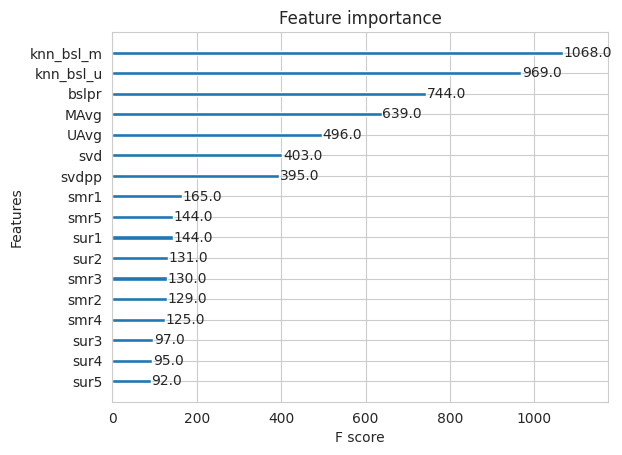

In [274]:
import xgboost as xgb
# prepare Train data
x_train = reg_train.drop(['user','movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# initialize Our first XGBoost model...
first_xgb = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
train_results, test_results = run_xgboost(first_xgb, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['first_algo'] = train_results
models_evaluation_test['first_algo'] = test_results

xgb.plot_importance(first_xgb)
plt.show()

<h3> 4.4.2 Suprise BaselineModel </h3>
    
__Predicted_rating : ( baseline prediction ) __

    -  http://surprise.readthedocs.io/en/stable/basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly
 >$   \large {\hat{r}_{ui} = b_{ui} =\mu + b_u + b_i} $


- $\pmb \mu $ : Average of all trainings in training data.
- $\pmb b_u$ : User bias
- $\pmb b_i$ : Item bias (movie biases)


__Optimization function ( Least Squares Problem ) __

    - http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baselines-estimates-configuration

> $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - (\mu + b_u + b_i)\right)^2 +
\lambda \left(b_u^2 + b_i^2 \right).\text {        [mimimize } {b_u, b_i]}$

In [275]:
from surprise import BaselineOnly
# Specify options for computing user and item biases using stochastic gradient descent (SGD)
bsl_options = {'method': 'sgd', 'learning_rate': .001}

# Initialize the BaselineOnly algorithm with the specified options
bsl_algo = BaselineOnly(bsl_options=bsl_options)

# Run the BaselineOnly algorithm on the training and test datasets
# This will return the results including RMSE and MAPE for both train and test data
bsl_train_results, bsl_test_results = run_surprise(bsl_algo, trainset, testset, verbose=True)

# Store the error metrics (RMSE, MAPE) in the models_evaluation dictionaries
models_evaluation_train['bsl_algo'] = bsl_train_results
models_evaluation_test['bsl_algo'] = bsl_test_results


Training the model...
Estimating biases using sgd...
Done. Time taken: 0:00:00.264335

Evaluating the model with TRAIN data...
Train Data
---------------
RMSE: 0.9344875933027939
MAPE: 29.375906490824487

Evaluating the model with TEST data...
Test Data
---------------
RMSE: 1.0730241536044924
MAPE: 35.049569598097506


---------------------------------------------
Total time taken to run this algorithm: 0:00:01.300204


<h3> 4.4.3 XGBoost with initial 13 features + Surprise Baseline predictor </h3>

__Updating Train Data__

In [276]:
# add our baseline_predicted value as our feature..
reg_train['bslpr'] = models_evaluation_train['bsl_algo']['predictions']
reg_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,692,5317,3.581679,4.0,4.0,4.0,3.0,4.0,4.0,4.0,...,4.0,4.0,4.0,3.390205,4,3.386101,4.102255,3.957087,3.889097,3.528205
1,692,14621,3.581679,4.0,5.0,4.0,5.0,5.0,4.0,4.0,...,4.0,4.0,4.0,4.326983,4,4.338319,3.938091,4.042913,4.303846,4.579098


__Updating Test Data__

In [217]:
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_df['bslpr']  = models_evaluation_test['bsl_algo']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,7,13072,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.581679
1,126,3418,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.581679


Training the model...


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:57:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Done. Time taken: 0:00:00.345450

Done

Evaluating the model with TRAIN data...
Evaluating Test data...

TEST DATA
------------------------------
RMSE:  1.0732868014186283
MAPE:  34.916002895730294


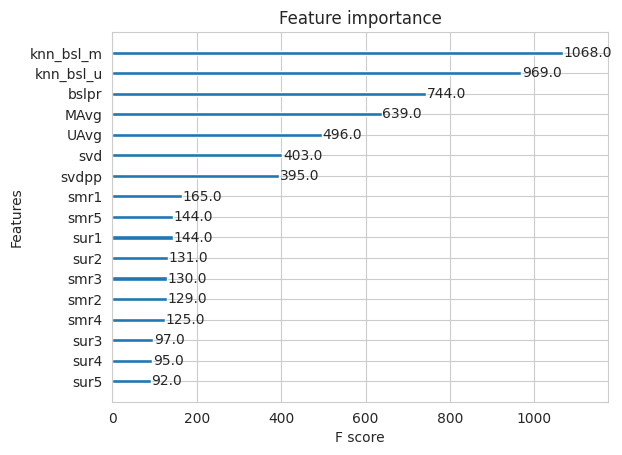

In [277]:
# prepare train data
x_train = reg_train.drop(['user', 'movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# initialize Our first XGBoost model...
xgb_bsl = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
train_results, test_results = run_xgboost(xgb_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_bsl'] = train_results
models_evaluation_test['xgb_bsl'] = test_results

xgb.plot_importance(xgb_bsl)
plt.show()


<h3> 4.4.4 Surprise KNNBaseline predictor </h3>

- KNN BASELINE
    - http://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline

- PEARSON_BASELINE SIMILARITY
    - http://surprise.readthedocs.io/en/stable/similarities.html#surprise.similarities.pearson_baseline

- SHRINKAGE
    - _2.2 Neighborhood Models_ in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf

- __predicted Rating__ : ( ___ based on User-User similarity ___ )

\begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - b_{vi})} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)} \end{align}

- $\pmb{b_{ui}}$ -  _Baseline prediction_ of (user,movie) rating

- $ \pmb {N_i^k (u)}$ - Set of __K similar__ users (neighbours) of __user (u)__ who rated __movie(i)__  

- _sim (u, v)_ - __Similarity__ between users __u and v__  
    - Generally, it will be cosine similarity or Pearson correlation coefficient.
    - But we use __shrunk Pearson-baseline correlation coefficient__, which is based on the pearsonBaseline similarity ( we take base line predictions instead of mean rating of user/item)

- __ Predicted rating __ ( based on Item Item similarity ):
 \begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{j \in N^k_u(i)}\text{sim}(i, j) \cdot (r_{uj} - b_{uj})} {\sum\limits_{j \in N^k_u(j)} \text{sim}(i, j)} \end{align}

    -  ___Notations follows same as above (user user based predicted rating ) ___

  <h4> 4.4.4.1 Surprise KNNBaseline with user user similarities</h4>

In [278]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              }
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'}

knn_bsl_u = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)
knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_results
models_evaluation_test['knn_bsl_u'] = knn_bsl_u_test_results


Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. Time taken: 0:00:20.051523

Evaluating the model with TRAIN data...
Train Data
---------------
RMSE: 0.3326086689457872
MAPE: 9.026224268336913

Evaluating the model with TEST data...
Test Data
---------------
RMSE: 1.072621567968458
MAPE: 35.01457329342193


---------------------------------------------
Total time taken to run this algorithm: 0:02:22.291428


<h4> 4.4.4.2 Surprise KNNBaseline with movie movie similarities</h4>

In [280]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm

# 'user_based' : Fals => this considers the similarities of movies instead of users

sim_options = {'user_based' : False,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              }
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'}


knn_bsl_m = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)

knn_bsl_m_train_results, knn_bsl_m_test_results = run_surprise(knn_bsl_m, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_m'] = knn_bsl_m_train_results
models_evaluation_test['knn_bsl_m'] = knn_bsl_m_test_results


Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. Time taken: 0:00:00.358961

Evaluating the model with TRAIN data...
Train Data
---------------
RMSE: 0.32274326141905824
MAPE: 8.365156641983974

Evaluating the model with TEST data...
Test Data
---------------
RMSE: 1.0727253582617668
MAPE: 35.016216769357115


---------------------------------------------
Total time taken to run this algorithm: 0:00:05.821095


<h3> 4.4.5 XGBoost with initial 13 features + Surprise Baseline predictor + KNNBaseline predictor </h3>

- First we will run XGBoost with predictions from both KNN's ( that uses User\_User and Item\_Item similarities along with our previous features.


-  Then we will run XGBoost with just predictions form both knn models and preditions from our baseline model.

__Preparing Train data __

In [221]:
# add the predicted values from both knns to this dataframe
reg_train['knn_bsl_u'] = models_evaluation_train['knn_bsl_u']['predictions']
reg_train['knn_bsl_m'] = models_evaluation_train['knn_bsl_m']['predictions']

reg_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,692,5317,3.581679,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.390205,4,3.386101,4.102255,3.957087
1,692,14621,3.581679,4.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.326983,4,4.338319,3.938091,4.042913


__Preparing Test data  __

In [222]:
reg_test_df['knn_bsl_u'] = models_evaluation_test['knn_bsl_u']['predictions']
reg_test_df['knn_bsl_m'] = models_evaluation_test['knn_bsl_m']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,7,13072,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.581679,3.581679,3.581679
1,126,3418,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.581679,3.581679,3.581679


Training the model...


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Done. Time taken: 0:00:00.512701

Done

Evaluating the model with TRAIN data...
Evaluating Test data...

TEST DATA
------------------------------
RMSE:  1.0732868014186283
MAPE:  34.916002895730294


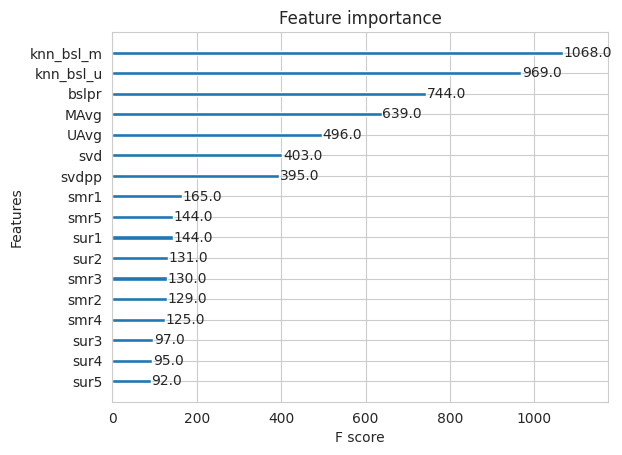

In [281]:
# prepare the train data....
x_train = reg_train.drop(['user', 'movie', 'rating'], axis=1)
y_train = reg_train['rating']

# prepare the train data....
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# declare the model
xgb_knn_bsl = xgb.XGBRegressor(n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_knn_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_knn_bsl'] = train_results
models_evaluation_test['xgb_knn_bsl'] = test_results


xgb.plot_importance(xgb_knn_bsl)
plt.show()

<h3> 4.4.6 Matrix Factorization Techniques </h3>

<h4> 4.4.6.1 SVD Matrix Factorization User Movie intractions </h4>

- __ Predicted Rating : __
    -
    - $ \large  \hat r_{ui} = \mu + b_u + b_i + q_i^Tp_u $
    
        - $\pmb q_i$ - Representation of item(movie) in latent factor space
        
        - $\pmb p_u$ - Representation of user in new latent factor space
        
- A BASIC MATRIX FACTORIZATION MODEL in  https://datajobs.com/data-science-repo/Recommender-Systems-[Netflix].pdf

- __Optimization problem with user item interactions and regularization (to avoid overfitting)__
    -
    - $\large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2\right) $

In [282]:
from surprise import SVD
# initiallize the model
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation data structure
models_evaluation_train['svd'] = svd_train_results
models_evaluation_test['svd'] = svd_test_results

Training the model...
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Done. Time taken: 0:00:01.307137

Evaluating the model with TRAIN data...
Train Data
---------------
RMSE: 0.6548261606952418
MAPE: 19.626305282540716

Evaluating the model with TEST data...
Test Data
---------------
RMSE: 1.0726488710783657
MAPE: 35.016586800134284


---------------------------------------------
Total time taken to run this algorithm: 0:00:02.544530


  <h4> 4.4.6.2 SVD Matrix Factorization with implicit feedback from user ( user rated movies ) </h4>

In [283]:
from surprise import SVDpp
# initiallize the model
svdpp = SVDpp(n_factors=50, random_state=15, verbose=True)
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svdpp'] = svdpp_train_results
models_evaluation_test['svdpp'] = svdpp_test_results


Training the model...
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
Done. Time taken: 0:00:16.687149

Evaluating the model with TRAIN data...
Train Data
---------------
RMSE: 0.6083860468406204
MAPE: 17.83343457139305

Evaluating the model with TEST data...
Test Data
---------------
RMSE: 1.0727645270360022
MAPE: 35.02862879857584


---------------------------------------------
Total time taken to run this algorithm: 0:00:22.367104


<h3> 4.4.7 XgBoost with 13 features + Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

__Preparing Train data__

In [227]:
# add the predicted values from both knns to this dataframe
reg_train['svd'] = models_evaluation_train['svd']['predictions']
reg_train['svdpp'] = models_evaluation_train['svdpp']['predictions']

reg_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,692,5317,3.581679,4.0,4.0,4.0,3.0,4.0,4.0,4.0,...,4.0,4.0,4.0,3.390205,4,3.386101,4.102255,3.957087,3.889097,3.528205
1,692,14621,3.581679,4.0,5.0,4.0,5.0,5.0,4.0,4.0,...,4.0,4.0,4.0,4.326983,4,4.338319,3.938091,4.042913,4.303846,4.579098


__Preparing Test data__

In [228]:
reg_test_df['svd'] = models_evaluation_test['svd']['predictions']
reg_test_df['svdpp'] = models_evaluation_test['svdpp']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,7,13072,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,...,3.581679,3.581679,3.581679,3.581679,5,3.581679,3.581679,3.581679,3.581679,3.581679
1,126,3418,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,...,3.581679,3.581679,3.581679,3.581679,5,3.581679,3.581679,3.581679,3.581679,3.581679


Training the model...


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Done. Time taken: 0:00:00.534998

Done

Evaluating the model with TRAIN data...
Evaluating Test data...

TEST DATA
------------------------------
RMSE:  1.0732868014186283
MAPE:  34.916002895730294


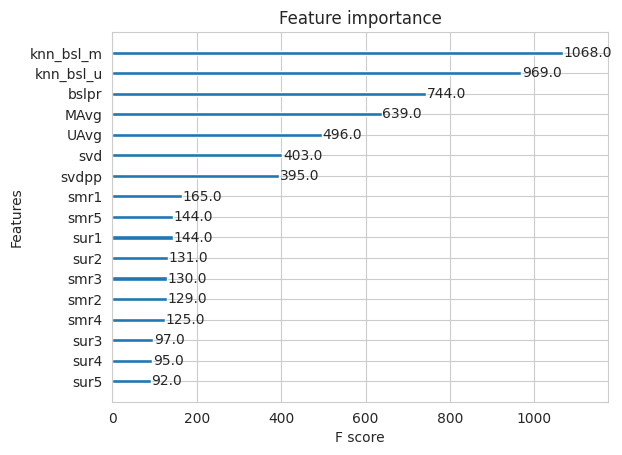

In [229]:
# prepare x_train and y_train
x_train = reg_train.drop(['user', 'movie', 'rating',], axis=1)
y_train = reg_train['rating']

# prepare test data
x_test = reg_test_df.drop(['user', 'movie', 'rating'], axis=1)
y_test = reg_test_df['rating']



xgb_final = xgb.XGBRegressor(n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_final, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_final'] = train_results
models_evaluation_test['xgb_final'] = test_results


xgb.plot_importance(xgb_final)
plt.show()

<h3> 4.4.8 XgBoost with Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

Training the model...


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Done. Time taken: 0:00:00.398950

Done

Evaluating the model with TRAIN data...
Evaluating Test data...

TEST DATA
------------------------------
RMSE:  1.090210840694537
MAPE:  36.33319936379437


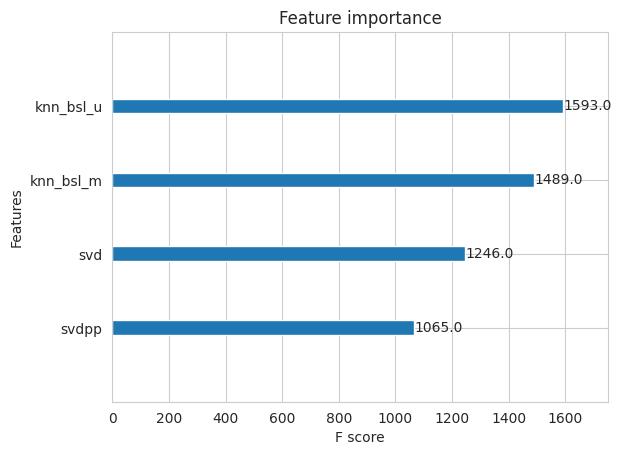

In [284]:
# prepare train data
x_train = reg_train[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_train = reg_train['rating']

# test data
x_test = reg_test_df[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_test = reg_test_df['rating']


xgb_all_models = xgb.XGBRegressor(n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_all_models, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_all_models'] = train_results
models_evaluation_test['xgb_all_models'] = test_results

xgb.plot_importance(xgb_all_models)
plt.show()

<h2> 4.5 Comparision between all models </h2>

In [285]:
# Saving our Train_RESULTS into a dataframe so that you don't have to run it again
pd.DataFrame(models_evaluation_train).to_csv('small_sample_trainresults.csv')
models = pd.read_csv('small_sample_trainresults.csv', index_col=0)
models.loc['rmse'].sort_values()

first_algo        0.11497348952012233
xgb_bsl           0.11497348952012233
xgb_knn_bsl       0.11497348952012233
xgb_all_models    0.15800545189844514
knn_bsl_m         0.32274326141905824
knn_bsl_u          0.3326086689457872
svdpp              0.6083860468406204
svd                0.6548261606952418
bsl_algo           0.9344875933027939
Name: rmse, dtype: object

In [286]:
# Saving our TEST_RESULTS into a dataframe so that you don't have to run it again
pd.DataFrame(models_evaluation_test).to_csv('small_sample_results.csv')
models = pd.read_csv('small_sample_results.csv', index_col=0)
models.loc['rmse'].sort_values()


knn_bsl_u          1.072621567968458
svd               1.0726488710783657
knn_bsl_m         1.0727253582617668
svdpp             1.0727645270360022
bsl_algo          1.0730241536044924
first_algo        1.0732868014186283
xgb_bsl           1.0732868014186283
xgb_knn_bsl       1.0732868014186283
xgb_all_models     1.090210840694537
Name: rmse, dtype: object

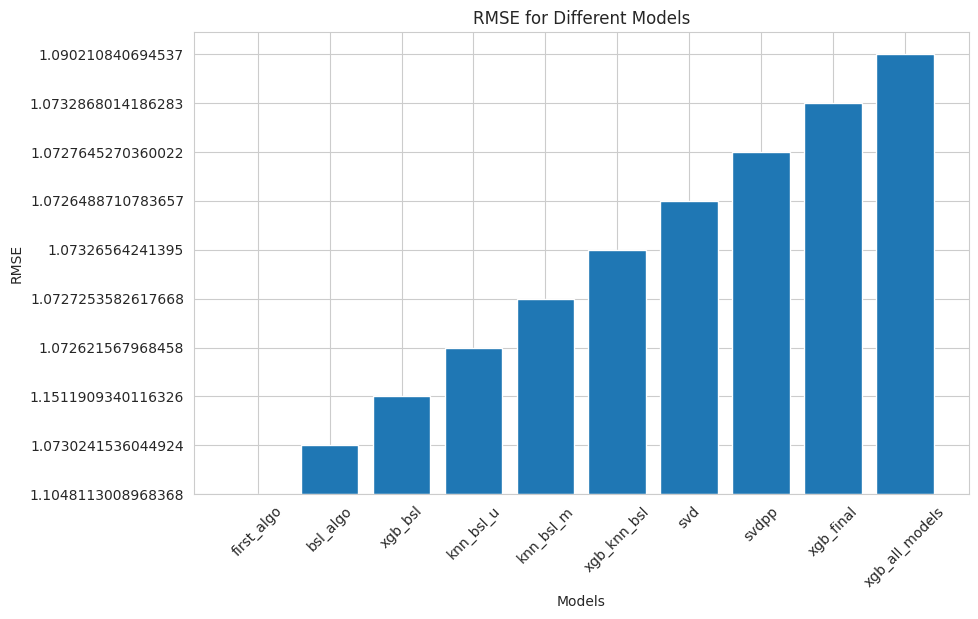

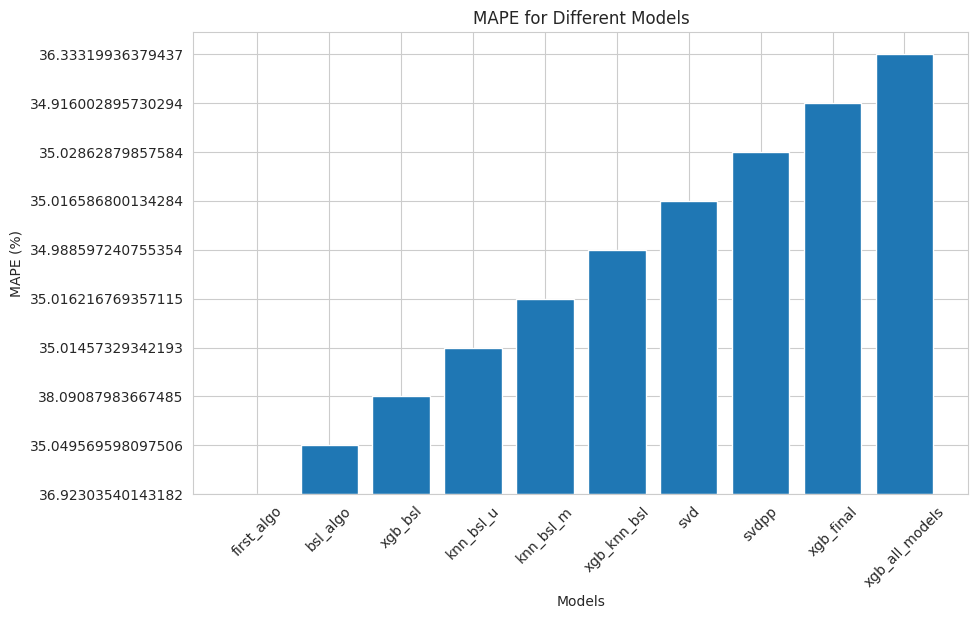

In [261]:
import matplotlib.pyplot as plt

# Assuming 'models' DataFrame contains the results
# Plotting RMSE
plt.figure(figsize=(10, 6))
plt.bar(models.columns, models.loc['rmse'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE for Different Models')
plt.xticks(rotation=45)
plt.show()

# Plotting MAPE
plt.figure(figsize=(10, 6))
plt.bar(models.columns, models.loc['mape'])
plt.xlabel('Models')
plt.ylabel('MAPE (%)')
plt.title('MAPE for Different Models')
plt.xticks(rotation=45)
plt.show()


 "knn_bsl_u" appears to be the best model among the ones listed here. However, it's essential to consider other factors such as computational efficiency, model complexity, and the specific requirements of your problem when selecting the best model for your needs.